In [1]:
from analysis.analyze_results import *
from pathlib import Path
import matplotlib

In [2]:
# output_base_folder = Path("/iarai/work/logs/storage_benchmarking")
output_base_folder = Path("/home/ivan/temp/temp-benchmarking")


## Dataloader benchmark (num workers, batch size)

**parameters**

| param | range |
| --- | --- |
| num_workers |0, 2, 4, 8, 16 | 
| batch_size | 8, 16, 32, 64 | 
| num_fetch_workers | 4, 8, 16, 32 | 
| fetch_impl | asyncio, threaded |
| dataset | s3,scratch |

Batch pool size is fixed to 10

**parameters explained**

| param | implementation | details | 
| --- | --- | --- |
| batch_pool_size | asyncio | Unused |
|  | threaded | Number of batches to fetch in parallel (normally, one batch is fetched, and items are downloaded (sequentially or in parallel). This implementation takes N batches and starts downloading items in parallel. Individual items are yielded and once a full batch is collected it is yielded.)|
| num_fetch_workers | asyncio | ThreadPoolExecutor argument for the maximum number of threads that can be used to execute the given calls. Also, the number of tasks initially placed into the task (worker) queue.  |
|  | threaded | ThreadPoolExecutor argument for the maximum number of threads that can be used to execute the given calls |

```bash
 for fetch_impl in "threaded" "asyncio"; do
   for storage in "s3" "scratch"; do
     for batch_size in 8 16 32 64; do
       for num_workers in 0 2 4 8 16; do
         for num_fetch_workers in 4 8 16 32; do
           python3 benchmark/benchmark_dataloader.py --output_base_folder /iarai/home/ivan.svogor/git/storage-benchmarking/src/benchmark_output/dataloader \
           --dataset "${storage}"  \
           --num_fetch_workers "${num_fetch_workers}" \
           --num_workers  "${num_workers}" \
           --repeat 1 \
           --num_batches 50 \
           --batch_size "${batch_size}" \
           --prefetch_factor 2 \
           --fetch_impl "${fetch_impl}"
         done
       done
     done
   done
 done
```

In [3]:
group_by_dataloader = ["dataset",  "num_fetch_workers", "num_workers", "batch_pool", "fetch_impl"]

In [4]:
s3_folder_filter="e2e0810/*benchmark_e2e_s3*"

In [5]:
# df_dataloader_s3_full = extract_pandas(output_base_folder, folder_filter="e2e-vanilla/*benchmark_e2e_s3*")
df_dataloader = extract_pandas(output_base_folder, folder_filter=s3_folder_filter)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8015/8015 [02:49<00:00, 47.15it/s]


In [6]:
df_s3_gpu_util = extract_gpu_utilization(output_base_folder, folder_filter=s3_folder_filter)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 82.51it/s]


In [7]:
df_s3_gpu_util

,run,gpu,gpu_mean,gpu_median,std
0,20211008f175136_benchmark_e2e_s3_512_0_16_sync,"[94.0, 46.0]",70.0000,70.0,24.000000
1,20211008f211713_benchmark_e2e_s3_64_0_16_sync,"[2.0, 26.0, 2.0, 45.0, 2.0, 30.0, 2.0, 37.0, 0...",21.4375,19.5,19.509513
2,20211008f172040_benchmark_e2e_s3_256_4_16_sync,"[8.0, 83.0, 34.0, 50.0]",43.7500,42.0,27.169606
3,20211008f204017_benchmark_e2e_s3_256_16_16_sync,"[21.0, 82.0, 8.0, 100.0]",52.7500,51.5,39.047247
4,20211008f215402_benchmark_e2e_s3_128_8_16_sync,"[63.0, 53.0, 21.0, 88.0, 85.0, 82.0, 43.0, 78.0]",64.1250,70.5,22.217322
5,20211008f155555_benchmark_e2e_s3_64_8_16_sync,"[48.0, 46.0, 55.0, 40.0, 80.0, 21.0, 0.0, 46.0...",38.0000,46.0,21.118712
6,20211008f212129_benchmark_e2e_s3_64_4_16_sync,"[2.0, 35.0, 2.0, 46.0, 42.0, 45.0, 2.0, 21.0, ...",26.5000,34.0,18.330303
7,20211008f222858_benchmark_e2e_s3_512_8_16_sync,"[15.0, 100.0]",57.5000,57.5,42.500000
8,20211008f164021_benchmark_e2e_s3_128_8_16_sync,"[4.0, 69.0, 76.0, 87.0, 53.0, 70.0, 77.0, 80.0]",64.5000,73.0,24.693116
9,20211008f194828_benchmark_e2e_s3_64_8_16_sync,"[79.0, 23.0, 2.0, 46.0, 81.0, 25.0, 63.0, 25.0...",43.3750,45.0,23.205266


In [9]:
df_dataloader_async=df_dataloader[df_dataloader["fetch_impl"]=="asyncio"]
df_dataloader_threaded=df_dataloader[df_dataloader["fetch_impl"]=="threaded"]
df_dataloader_vanilla=df_dataloader[df_dataloader["fetch_impl"]=="vanilla"]

In [10]:
print(df_dataloader.groupby(group_by_dataloader).groups.keys())

dict_keys([('s3', 16, 0, 10, 'asyncio'), ('s3', 16, 0, 10, 'threaded'), ('s3', 16, 0, 10, 'vanilla'), ('s3', 16, 4, 10, 'asyncio'), ('s3', 16, 4, 10, 'threaded'), ('s3', 16, 4, 10, 'vanilla'), ('s3', 16, 8, 10, 'asyncio'), ('s3', 16, 8, 10, 'threaded'), ('s3', 16, 8, 10, 'vanilla'), ('s3', 16, 16, 10, 'asyncio'), ('s3', 16, 16, 10, 'threaded'), ('s3', 16, 16, 10, 'vanilla'), ('s3', 16, 32, 10, 'asyncio'), ('s3', 16, 32, 10, 'threaded'), ('s3', 16, 32, 10, 'vanilla')])


In [11]:
group_by_dataloader = ["dataset",  "num_fetch_workers", "num_workers", "batch_pool", "fetch_impl", "gpu_median"]

In [12]:
df_dataloader_async = pd.merge(df_dataloader_async, df_s3_gpu_util, left_on='run', right_on='run')
df_dataloader_threaded = pd.merge(df_dataloader_threaded, df_s3_gpu_util, left_on='run', right_on='run')
df_dataloader_vanilla = pd.merge(df_dataloader_vanilla, df_s3_gpu_util, left_on='run', right_on='run')

In [13]:
display(get_run_stats(df_dataloader_async, group_by=group_by_dataloader))

downloaded data [B]  \
dataset num_fetch_workers num_workers batch_pool fetch_impl gpu_median run                                                                    
s3      16                0           10         asyncio    0.0        20211008f222314_benchmark_e2e_s3_512_0_16_sync          1.443941e+09   
                                                            6.5        20211008f214812_benchmark_e2e_s3_128_0_16_sync          1.338662e+09   
                                                            19.5       20211008f211713_benchmark_e2e_s3_64_0_16_sync           1.322931e+09   
                                                            32.0       20211008f220802_benchmark_e2e_s3_256_0_16_sync          1.373611e+09   
                          4           10         asyncio    34.0       20211008f212129_benchmark_e2e_s3_64_4_16_sync           2.713153e+09   
                                                            46.5       20211008f215109_benchmark_e2e_s3_128_4_16_sync          2.887881e+09   
                                                                       20211008f221047_benchmark_e2e_s3_256_4_16_sync          2.887881e+09   
                                                            57.5       20211008f222601_benchmark_e2e_s3_512_4_16_sync          2.887881e+09   
                          8           10         asyncio    45.0       20211008f212421_benchmark_e2e_s3_64_8_16_sync           2.784193e+09   
                                                            51.0       20211008f221345_benchmark_e2e_s3_256_8_16_sync          2.887881e+09   
                                                            57.5       20211008f222858_benchmark_e2e_s3_512_8_16_sync          2.887881e+09   
                                                            70.5       20211008f215402_benchmark_e2e_s3_128_8_16_sync          2.887881e+09   
                          16          10         asyncio    28.5       20211008f212904_benchmark_e2e_s3_64_16_16_sync          2.887881e+09   
                                                            49.5       20211008f223144_benchmark_e2e_s3_512_16_16_sync         2.887881e+09   
                                                            55.5       20211008f221646_benchmark_e2e_s3_256_16_16_sync         2.887881e+09   
                                                            79.0       20211008f215834_benchmark_e2e_s3_128_16_16_sync         2.887881e+09   
                          32          10         asyncio    31.5       20211008f213749_benchmark_e2e_s3_64_32_16_sync          2.887881e+09   
                                                            34.0       20211008f223432_benchmark_e2e_s3_512_32_16_sync         2.887881e+09   
                                                            61.0       20211008f220308_benchmark_e2e_s3_128_32_16_sync         2.887881e+09   
                                                            62.0       20211008f221959_benchmark_e2e_s3_256_32_16_sync         2.887881e+09   

                                                                                                                          time_start  \
dataset num_fetch_workers num_workers batch_pool fetch_impl gpu_median run                                                             
s3      16                0           10         asyncio    0.0        20211008f222314_benchmark_e2e_s3_512_0_16_sync   1.633725e+09   
                                                            6.5        20211008f214812_benchmark_e2e_s3_128_0_16_sync   1.633722e+09   
                                                            19.5       20211008f211713_benchmark_e2e_s3_64_0_16_sync    1.633721e+09   
                                                            32.0       20211008f220802_benchmark_e2e_s3_256_0_16_sync   1.633724e+09   
                          4           10         asyncio    34.0       20211008f212129_benchmark_e2e_s3_64_4_16_sync    1.633721e+09   
                     

In [14]:
display(get_run_stats(df_dataloader_threaded, group_by=group_by_dataloader))

downloaded data [B]  \
dataset num_fetch_workers num_workers batch_pool fetch_impl gpu_median run                                                                    
s3      16                0           10         threaded   23.0       20211008f194210_benchmark_e2e_s3_64_0_16_sync           2.339791e+09   
                                                            40.0       20211008f203051_benchmark_e2e_s3_256_0_16_sync          2.584834e+09   
                                                            45.5       20211008f204716_benchmark_e2e_s3_512_0_16_sync          2.887881e+09   
                                                            52.0       20211008f201010_benchmark_e2e_s3_128_0_16_sync          2.427447e+09   
                          4           10         threaded   43.0       20211008f194537_benchmark_e2e_s3_64_4_16_sync           2.451895e+09   
                                                            48.5       20211008f205040_benchmark_e2e_s3_512_4_16_sync          2.782157e+09   
                                                            65.5       20211008f201333_benchmark_e2e_s3_128_4_16_sync          2.497082e+09   
                                                            80.0       20211008f203416_benchmark_e2e_s3_256_4_16_sync          2.466252e+09   
                          8           10         threaded   23.5       20211008f203718_benchmark_e2e_s3_256_8_16_sync          2.466252e+09   
                                                            45.0       20211008f194828_benchmark_e2e_s3_64_8_16_sync           2.605538e+09   
                                                            51.5       20211008f205318_benchmark_e2e_s3_512_8_16_sync          2.782157e+09   
                                                            60.0       20211008f201629_benchmark_e2e_s3_128_8_16_sync          2.635309e+09   
                          16          10         threaded   45.5       20211008f195308_benchmark_e2e_s3_64_16_16_sync          2.538207e+09   
                                                            51.5       20211008f204017_benchmark_e2e_s3_256_16_16_sync         2.466252e+09   
                                                            57.5       20211008f205602_benchmark_e2e_s3_512_16_16_sync         2.782157e+09   
                                                            63.5       20211008f202107_benchmark_e2e_s3_128_16_16_sync         2.635309e+09   
                          32          10         threaded   46.0       20211008f200136_benchmark_e2e_s3_64_32_16_sync          2.538207e+09   
                                                            47.5       20211008f204327_benchmark_e2e_s3_256_32_16_sync         2.466252e+09   
                                                            54.0       20211008f202559_benchmark_e2e_s3_128_32_16_sync         2.635309e+09   
                                                            55.0       20211008f205849_benchmark_e2e_s3_512_32_16_sync         2.782157e+09   

                                                                                                                          time_start  \
dataset num_fetch_workers num_workers batch_pool fetch_impl gpu_median run                                                             
s3      16                0           10         threaded   23.0       20211008f194210_benchmark_e2e_s3_64_0_16_sync    1.633715e+09   
                                                            40.0       20211008f203051_benchmark_e2e_s3_256_0_16_sync   1.633718e+09   
                                                            45.5       20211008f204716_benchmark_e2e_s3_512_0_16_sync   1.633719e+09   
                                                            52.0       20211008f201010_benchmark_e2e_s3_128_0_16_sync   1.633717e+09   
                          4           10         threaded   43.0       20211008f194537_benchmark_e2e_s3_64_4_16_sync    1.633715e+09   
                     

In [15]:
display(get_run_stats(df_dataloader_vanilla, group_by=group_by_dataloader))

downloaded data [B]  \
dataset num_fetch_workers num_workers batch_pool fetch_impl gpu_median run                                                                    
s3      16                0           10         vanilla    11.0       20211008f151925_benchmark_e2e_s3_64_0_16_sync           1.322931e+09   
                                                            34.5       20211008f165316_benchmark_e2e_s3_256_0_16_sync          1.373611e+09   
                                                            66.0       20211008f160554_benchmark_e2e_s3_128_0_16_sync          1.338662e+09   
                                                            70.0       20211008f175136_benchmark_e2e_s3_512_0_16_sync          1.443941e+09   
                          4           10         vanilla    32.5       20211008f154825_benchmark_e2e_s3_64_4_16_sync           2.728906e+09   
                                                            39.5       20211008f182024_benchmark_e2e_s3_512_4_16_sync          2.887881e+09   
                                                            42.0       20211008f172040_benchmark_e2e_s3_256_4_16_sync          2.887881e+09   
                                                            62.5       20211008f163238_benchmark_e2e_s3_128_4_16_sync          2.883572e+09   
                          8           10         vanilla    38.0       20211008f183537_benchmark_e2e_s3_512_8_16_sync          2.887881e+09   
                                                            46.0       20211008f155555_benchmark_e2e_s3_64_8_16_sync           2.887881e+09   
                                                            73.0       20211008f164021_benchmark_e2e_s3_128_8_16_sync          2.887881e+09   
                                                            87.0       20211008f172830_benchmark_e2e_s3_256_8_16_sync          2.887881e+09   
                          16          10         vanilla    46.0       20211008f160006_benchmark_e2e_s3_64_16_16_sync          2.887881e+09   
                                                            54.0       20211008f173606_benchmark_e2e_s3_256_16_16_sync         2.887881e+09   
                                                            57.5       20211008f185017_benchmark_e2e_s3_512_16_16_sync         2.887881e+09   
                                                            59.0       20211008f164435_benchmark_e2e_s3_128_16_16_sync         2.887881e+09   
                          32          10         vanilla    27.0       20211008f190456_benchmark_e2e_s3_512_32_16_sync         2.887881e+09   
                                                            45.5       20211008f160255_benchmark_e2e_s3_64_32_16_sync          2.887881e+09   
                                                            68.0       20211008f174345_benchmark_e2e_s3_256_32_16_sync         2.887881e+09   
                                                            80.5       20211008f164850_benchmark_e2e_s3_128_32_16_sync         2.887881e+09   

                                                                                                                          time_start  \
dataset num_fetch_workers num_workers batch_pool fetch_impl gpu_median run                                                             
s3      16                0           10         vanilla    11.0       20211008f151925_benchmark_e2e_s3_64_0_16_sync    1.633699e+09   
                                                            34.5       20211008f165316_benchmark_e2e_s3_256_0_16_sync   1.633705e+09   
                                                            66.0       20211008f160554_benchmark_e2e_s3_128_0_16_sync   1.633702e+09   
                                                            70.0       20211008f175136_benchmark_e2e_s3_512_0_16_sync   1.633708e+09   
                          4           10         vanilla    32.5       20211008f154825_benchmark_e2e_s3_64_4_16_sync    1.633701e+09   
                     

In [16]:
display(get_thread_stats(df_dataloader_async,group_by=group_by_dataloader))

,time_start_thread,time_end_thread,total_elapsed_thread,dataset,num_fetch_workers,num_workers,batch_pool,fetch_impl,gpu_median,elapsed_thread,elapsed_processing
threading_ident,,,,,,,,,,,
139642227267328,1.633725e+09,1.633725e+09,47.188486,s3,16,32,10,asyncio,34.0,11.994287,3.934247
139642235660032,1.633725e+09,1.633725e+09,47.332654,s3,16,32,10,asyncio,34.0,12.035266,3.932830
139642244052736,1.633725e+09,1.633725e+09,47.366033,s3,16,32,10,asyncio,34.0,12.001688,3.946614
139642252445440,1.633725e+09,1.633725e+09,47.320402,s3,16,32,10,asyncio,34.0,12.034415,3.932090
139642260838144,1.633725e+09,1.633725e+09,142.602348,s3,16,32,10,asyncio,34.0,72.825751,1.958131
...,...,...,...,...,...,...,...,...,...,...,...
140649636013824,1.633725e+09,1.633725e+09,23.731624,s3,16,16,10,asyncio,49.5,12.040059,1.971055
140649636026112,1.633725e+09,1.633725e+09,23.084304,s3,16,16,10,asyncio,49.5,11.682156,1.976031
140649643972352,1.633725e+09,1.633725e+09,47.993648,s3,16,16,10,asyncio,49.5,12.359472,3.883147


### S3 Event plots of dataloading

#### S3


In [17]:
df_dataloader_s3_async=df_dataloader_async[df_dataloader_async["dataset"]=="s3"]
df_dataloader_s3_threaded=df_dataloader_threaded[df_dataloader_threaded["dataset"]=="s3"]
df_dataloader_s3_vanilla=df_dataloader_vanilla[df_dataloader_vanilla["dataset"]=="s3"]

In [18]:
print(np.unique(df_dataloader_s3_async["num_workers"].to_numpy()))
print(np.unique(df_dataloader_s3_async["num_fetch_workers"].to_numpy()))
print(np.unique(df_dataloader_s3_async["batch_size"].to_numpy()))


[ 0  4  8 16 32]
[16]
[ 64 128 256 512]


In [19]:
def print_rate_table(df):
    rate_matrix = pd.DataFrame(columns=["batch_size", "num_fetch_workers", "num_workers", "rate"])
    for i, batch_size in enumerate(np.unique(df["batch_size"].to_numpy())):
        for j, num_fetch_workers in enumerate(np.unique(df["num_fetch_workers"].to_numpy())):
            for k, num_workers in enumerate(np.unique(df["num_workers"].to_numpy())):
                run = df[(df["num_fetch_workers"]==num_fetch_workers) & 
                         (df["num_workers"]==num_workers) &
                         (df["batch_size"]==batch_size)]["run"].iloc[0]
                mbps, mbitps = plot_events_timeline(df[df["run"]==run], 
                                                    summary_only=True, 
                                                    verbose=False)
                if "GB" in list(mbitps)[0]:
                    r = float(list(mbitps)[0].replace("GB", "")) * 1000
                else:
                    r = float(list(mbitps)[0].replace("MB", ""))
                median = df_s3_gpu_util[df_s3_gpu_util["run"]==run]["gpu_mean"]
                rate_matrix = rate_matrix.append({'batch_size': batch_size, 
                                                  'num_fetch_workers': num_fetch_workers, 
                                                  'num_workers': num_workers,
                                                  'gpu_median': list(median)[0],
                                                  'rate': r}, ignore_index=True)    
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        print(rate_matrix.sort_values(["rate"], ascending=False))
    return rate_matrix

In [20]:
s3_rate_matrix_asyncio = print_rate_table(df_dataloader_s3_async)

    batch_size  num_fetch_workers  num_workers   rate  gpu_median
17       512.0               16.0          8.0  144.5     57.5000
16       512.0               16.0          4.0  144.2     57.5000
18       512.0               16.0         16.0  143.0     49.5000
6        128.0               16.0          4.0  138.9     41.2500
19       512.0               16.0         32.0  136.5     34.0000
11       256.0               16.0          4.0  135.4     50.2500
12       256.0               16.0          8.0  132.6     52.5000
1         64.0               16.0          4.0  132.0     26.5000
13       256.0               16.0         16.0  124.5     54.7500
14       256.0               16.0         32.0  123.1     56.2500
7        128.0               16.0          8.0   87.0     64.1250
8        128.0               16.0         16.0   86.6     66.3750
2         64.0               16.0          8.0   82.6     36.7500
9        128.0               16.0         32.0   80.3     57.6250
15       5

#### Threaded

In [21]:
print(np.unique(df_dataloader_s3_threaded["num_workers"].to_numpy()))
print(np.unique(df_dataloader_s3_threaded["num_fetch_workers"].to_numpy()))
print(np.unique(df_dataloader_s3_threaded["batch_size"].to_numpy()))

[ 0  4  8 16 32]
[16]
[ 64 128 256 512]


In [22]:
s3_rate_matrix_threaded = print_rate_table(df_dataloader_s3_threaded)

    batch_size  num_fetch_workers  num_workers   rate  gpu_median
16       512.0               16.0          4.0  146.5     48.5000
17       512.0               16.0          8.0  142.2     51.5000
18       512.0               16.0         16.0  138.1     57.5000
19       512.0               16.0         32.0  130.5     55.0000
1         64.0               16.0          4.0  119.1     31.6875
6        128.0               16.0          4.0  118.3     54.2500
15       512.0               16.0          0.0  117.3     45.5000
12       256.0               16.0          8.0  113.8     38.7500
11       256.0               16.0          4.0  112.8     70.2500
13       256.0               16.0         16.0  107.7     52.7500
10       256.0               16.0          0.0  104.1     44.7500
5        128.0               16.0          0.0   98.9     43.2500
0         64.0               16.0          0.0   93.3     22.6250
14       256.0               16.0         32.0   88.5     49.0000
7        1

In [23]:
s3_rate_matrix_vanilla = print_rate_table(df_dataloader_s3_vanilla)

    batch_size  num_fetch_workers  num_workers   rate  gpu_median
3         64.0               16.0         16.0  142.0     45.5000
4         64.0               16.0         32.0  134.9     47.9375
2         64.0               16.0          8.0   94.6     38.0000
7        128.0               16.0          8.0   93.5     64.5000
8        128.0               16.0         16.0   92.8     54.6250
9        128.0               16.0         32.0   89.2     66.2500
12       256.0               16.0          8.0   51.3     70.5000
13       256.0               16.0         16.0   51.2     54.0000
6        128.0               16.0          4.0   50.6     58.8750
11       256.0               16.0          4.0   49.9     43.7500
14       256.0               16.0         32.0   49.8     60.2500
1         64.0               16.0          4.0   49.3     28.6250
18       512.0               16.0         16.0   26.5     57.5000
17       512.0               16.0          8.0   26.5     38.0000
19       5

In [24]:
print(np.unique(df_dataloader_s3_vanilla["num_workers"].to_numpy()))
print(np.unique(df_dataloader_s3_vanilla["num_fetch_workers"].to_numpy()))
print(np.unique(df_dataloader_s3_vanilla["batch_size"].to_numpy()))

[ 0  4  8 16 32]
[16]
[ 64 128 256 512]


In [25]:
s3_both = pd.concat([s3_rate_matrix_asyncio, 
                     s3_rate_matrix_threaded[["rate", "gpu_median"]],
                     s3_rate_matrix_vanilla[["rate", "gpu_median"]]], 
                     ignore_index = True, axis = 1)
# s3_both['diff'] = s3_both.apply(lambda row: float(row[4] - row[3]) , axis = 1)
s3_both.columns = ['batch_size', 'num_fetch_workers', 'num_workers', 'a_rate', 'a_gpu', 't_rate', 't_gpu', 'v_rate', 'v_gpu']
# both["diff"] = both["diff"].clip(lower=0)
# # both

s3_both.sort_values(["v_rate"], ascending=True)

,batch_size,num_fetch_workers,num_workers,a_rate,a_gpu,t_rate,t_gpu,v_rate,v_gpu
0,64.0,16.0,0.0,54.5,21.4375,93.3,22.6250,6.1,15.8750
15,512.0,16.0,0.0,71.8,0.0000,117.3,45.5000,6.7,70.0000
5,128.0,16.0,0.0,62.9,33.0000,98.9,43.2500,6.7,47.5000
10,256.0,16.0,0.0,68.9,29.5000,104.1,44.7500,6.8,38.7500
16,512.0,16.0,4.0,144.2,57.5000,146.5,48.5000,25.5,39.5000
19,512.0,16.0,32.0,136.5,34.0000,130.5,55.0000,25.8,27.0000
18,512.0,16.0,16.0,143.0,49.5000,138.1,57.5000,26.5,57.5000
17,512.0,16.0,8.0,144.5,57.5000,142.2,51.5000,26.5,38.0000
1,64.0,16.0,4.0,132.0,26.5000,119.1,31.6875,49.3,28.6250
14,256.0,16.0,32.0,123.1,56.2500,88.5,49.0000,49.8,60.2500


Text(0.5, 1.0, 'Async: pinned (scratch - blue, s3 - green), unpinned (scratch - red, s3 - pink)')

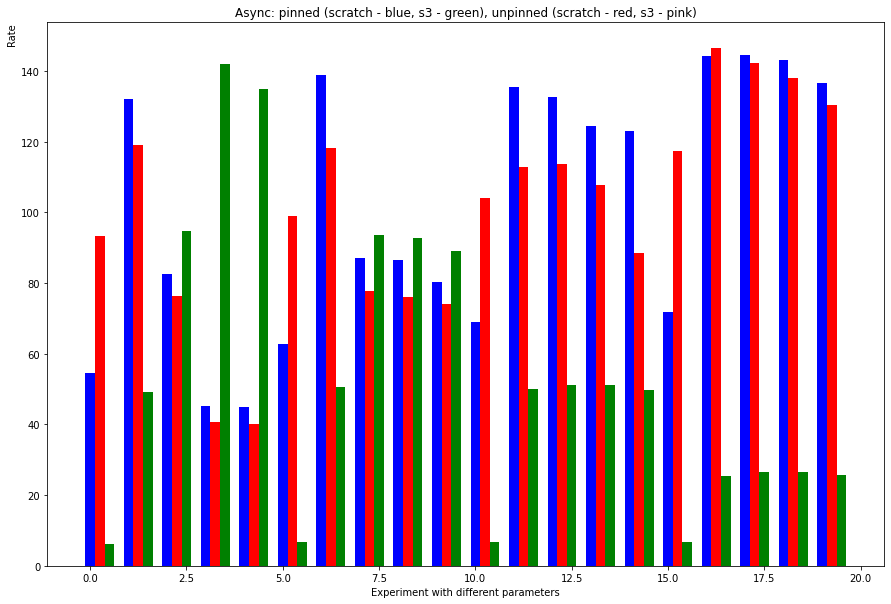

In [26]:
fig, ax = plt.subplots(figsize=(15, 10))
# ax.axis(ymin=0.0, ymax=0.01)
ax.bar(x=[x+0.0 for x in range(len(s3_both))], height=s3_both["a_rate"], width=0.25, color="blue")
ax.bar(x=[x+0.25 for x in range(len(s3_both))], height=s3_both["t_rate"], width=0.25, color="red")
ax.bar(x=[x+0.50 for x in range(len(s3_both))], height=s3_both["v_rate"], width=0.25, color="green")

ax.set_xlabel("Experiment with different parameters", loc="center")
ax.set_ylabel("Rate", loc="top")
ax.set_title(f"Async: pinned (scratch - blue, s3 - green), unpinned (scratch - red, s3 - pink)", loc='center')

Text(0.5, 1.0, 'Async: pinned (scratch - blue, s3 - green), unpinned (scratch - red, s3 - pink)')

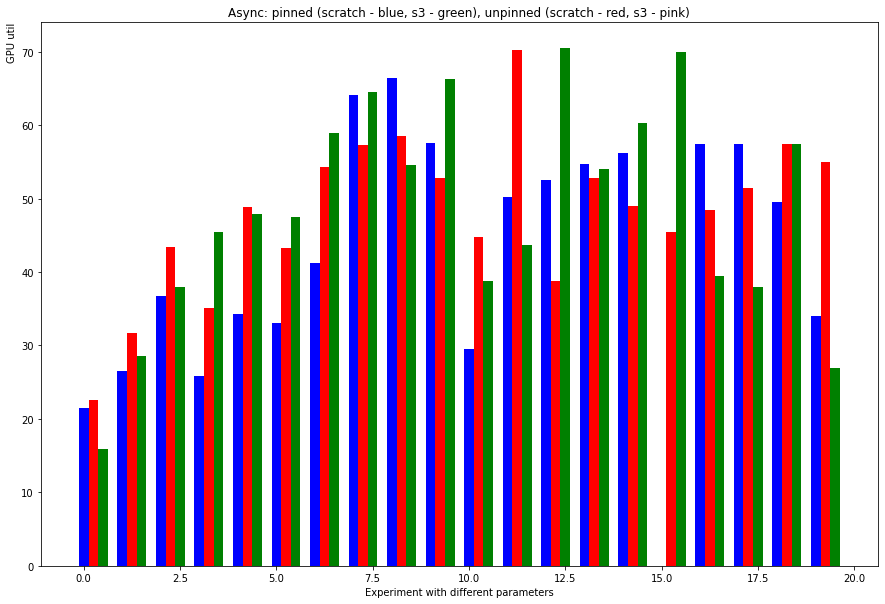

In [27]:

fig, ax = plt.subplots(figsize=(15, 10))
# ax.axis(ymin=0.0, ymax=0.01)
ax.bar(x=[x+0.0 for x in range(len(s3_both))], height=s3_both["a_gpu"], width=0.25, color="blue")
ax.bar(x=[x+0.25 for x in range(len(s3_both))], height=s3_both["t_gpu"], width=0.25, color="red")
ax.bar(x=[x+0.50 for x in range(len(s3_both))], height=s3_both["v_gpu"], width=0.25, color="green")

ax.set_xlabel("Experiment with different parameters", loc="center")
ax.set_ylabel("GPU util", loc="top")
ax.set_title(f"Async: pinned (scratch - blue, s3 - green), unpinned (scratch - red, s3 - pink)", loc='center')


10368
Lines num: 10463


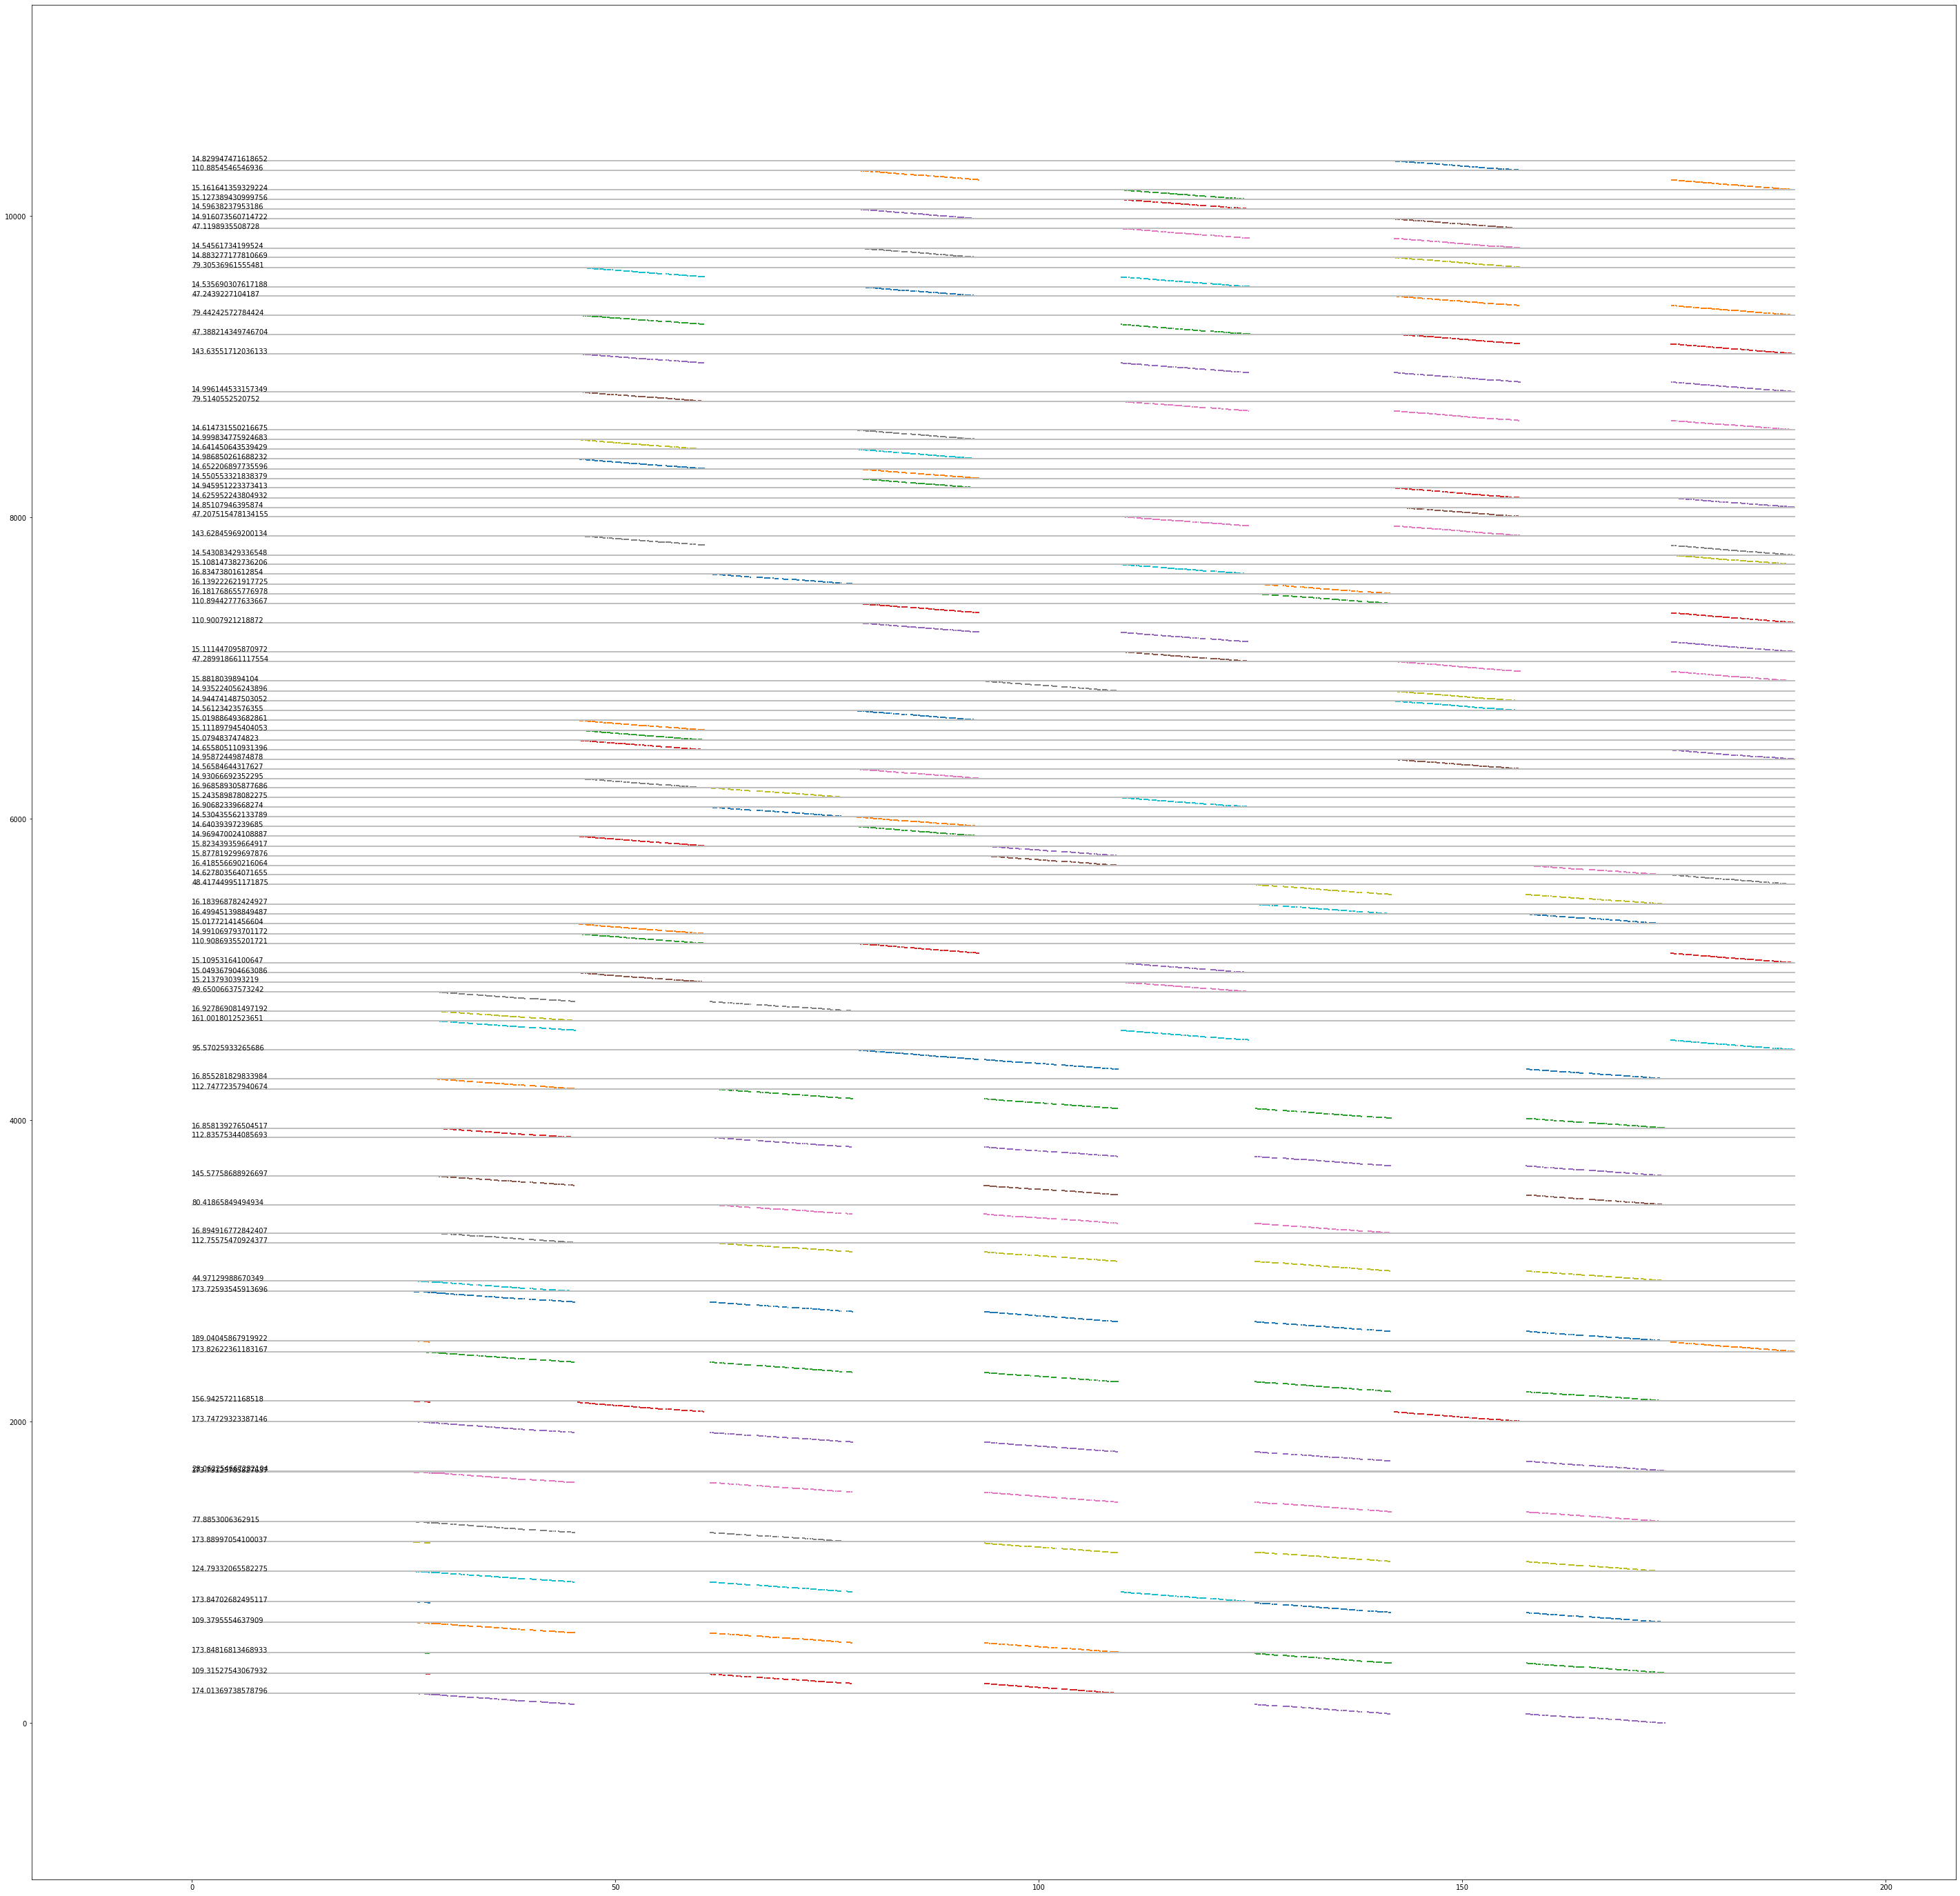

In [28]:
run = df_dataloader_async[(df_dataloader_async["num_workers"]==0) & 
                          (df_dataloader_async["batch_size"]==64)]["run"].iloc[0]
len(run)
plot_events_timeline_detailed(df_dataloader_async[df_dataloader_async["run"]==run], 
                              filter_function="__getitem__")


20864
Lines num: 20936


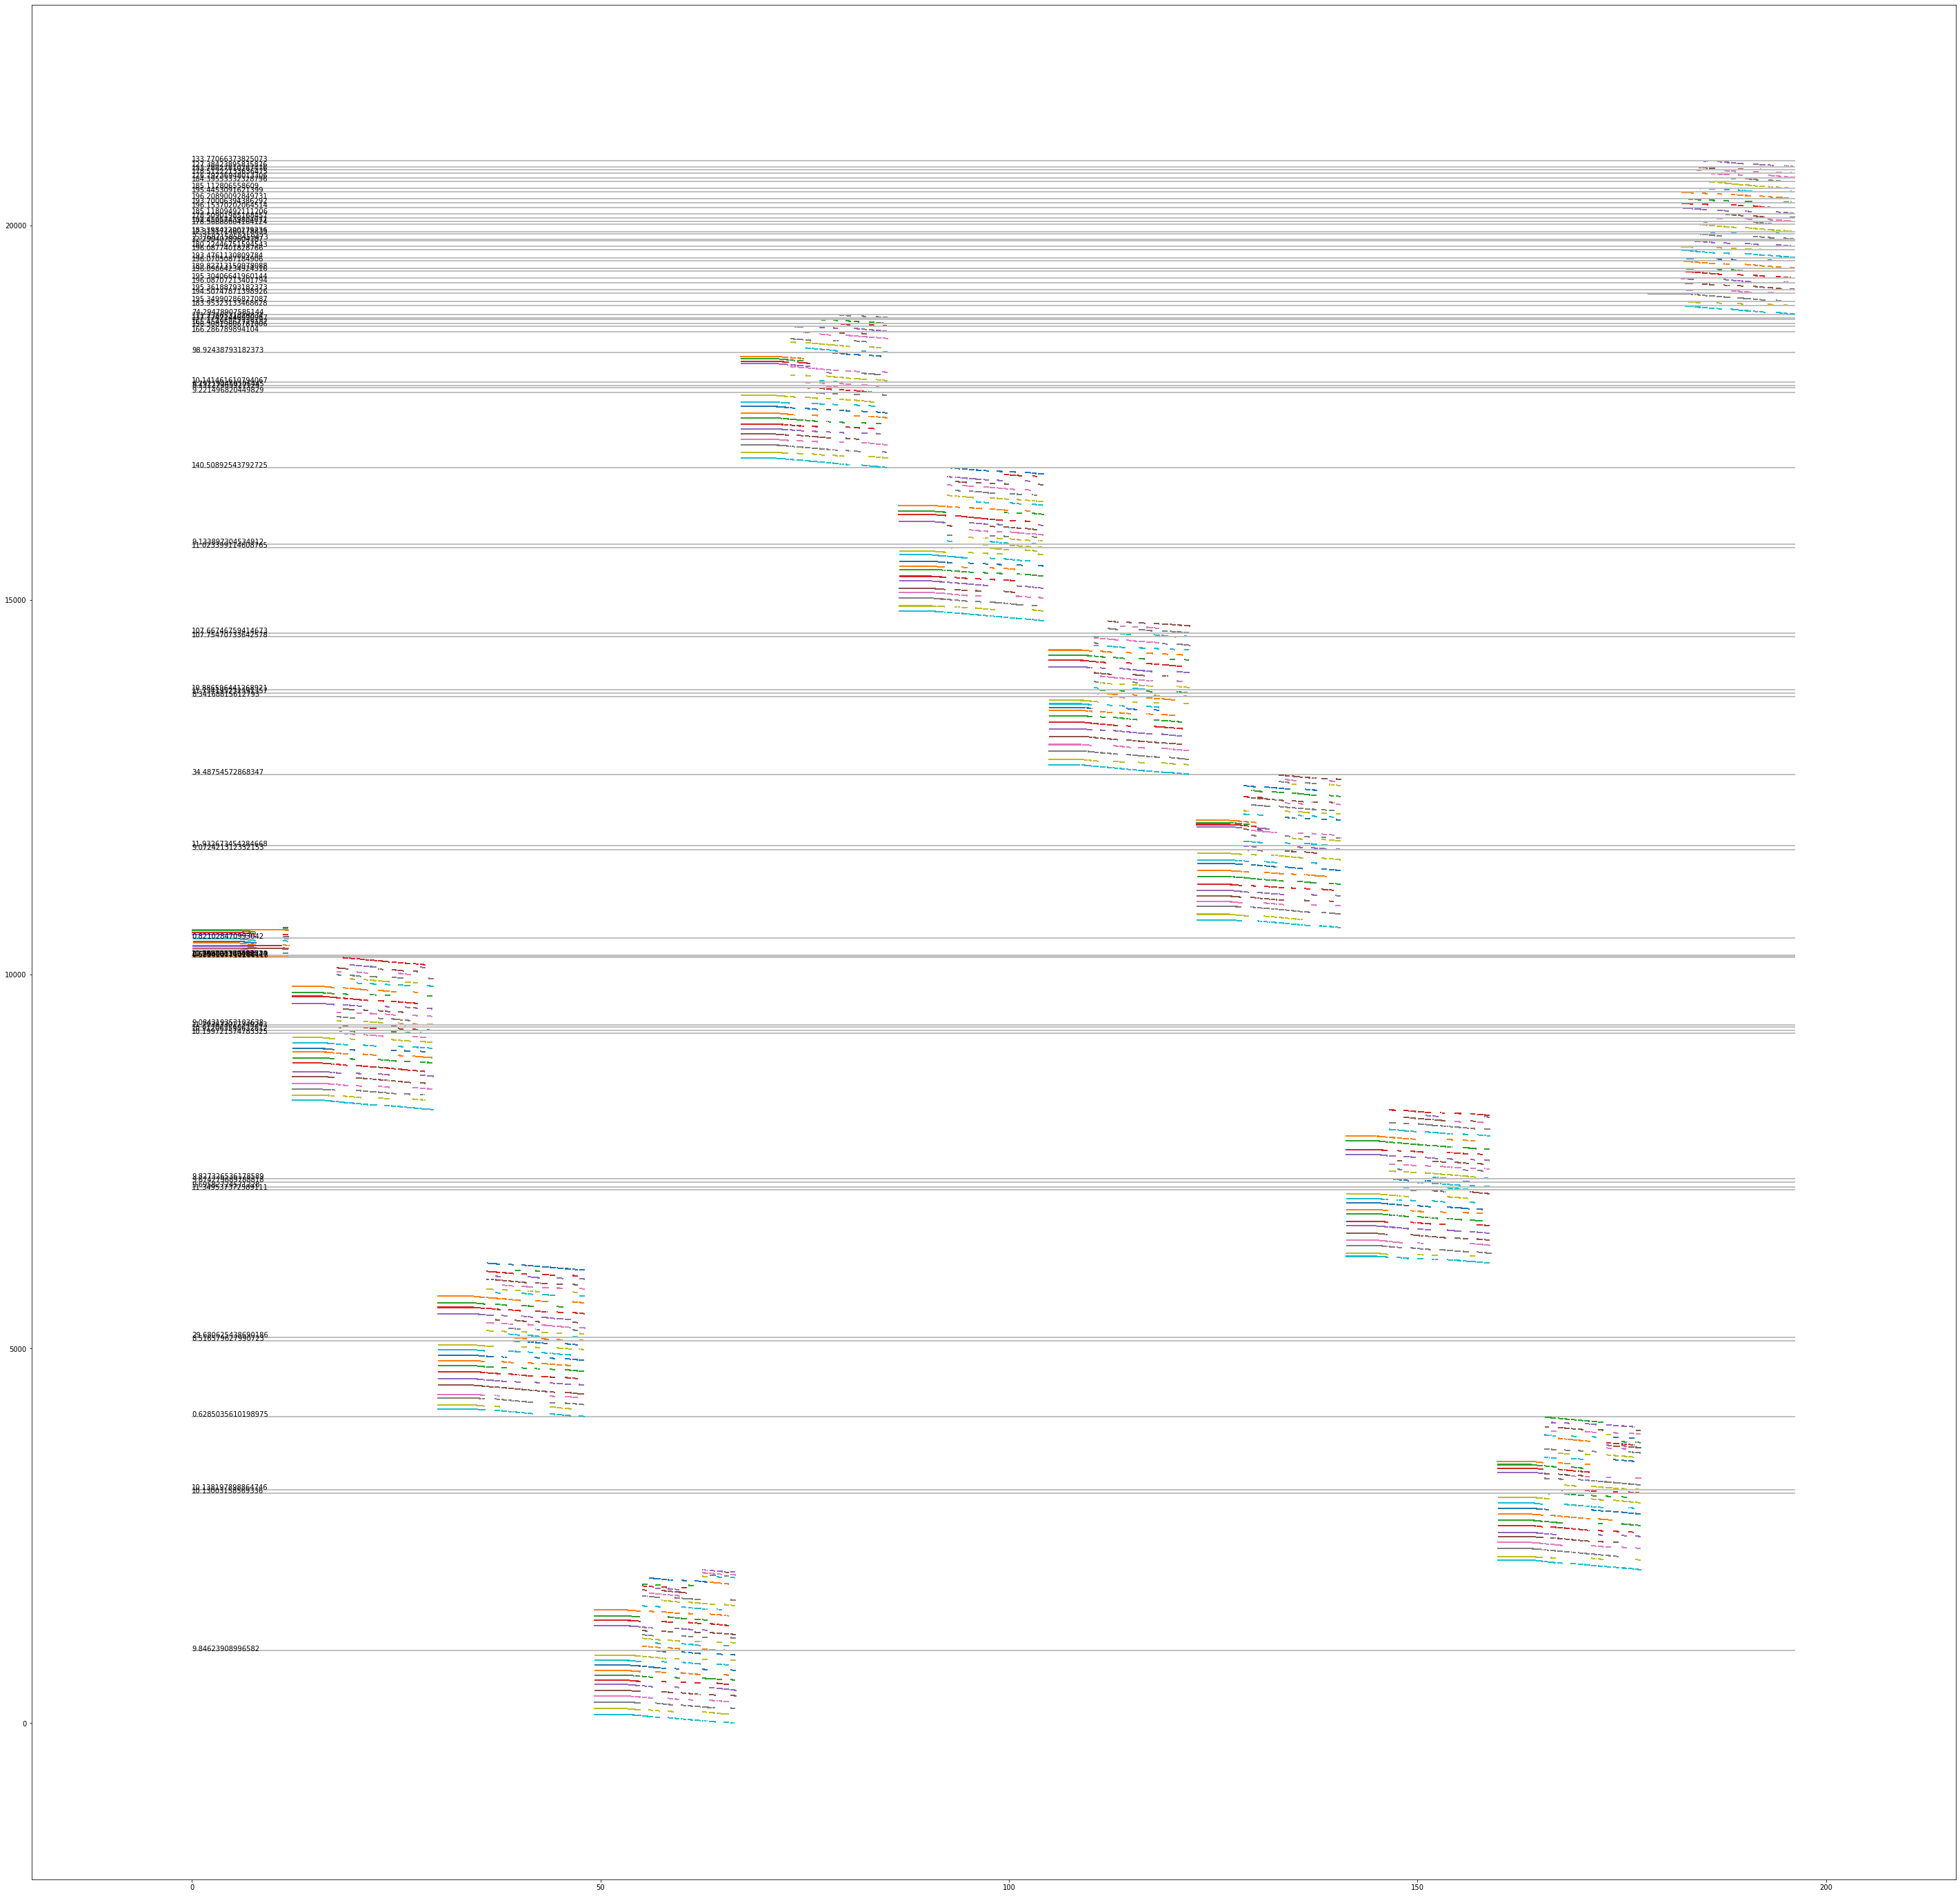

In [29]:
run = df_dataloader_threaded[(df_dataloader_threaded["num_workers"]==0) & 
                             (df_dataloader_threaded["batch_size"]==64)]["run"].iloc[0]
len(run)
plot_events_timeline_detailed(df_dataloader_threaded[df_dataloader_threaded["run"]==run], 
                              filter_function="__getitem__")


10368
Lines num: 10369


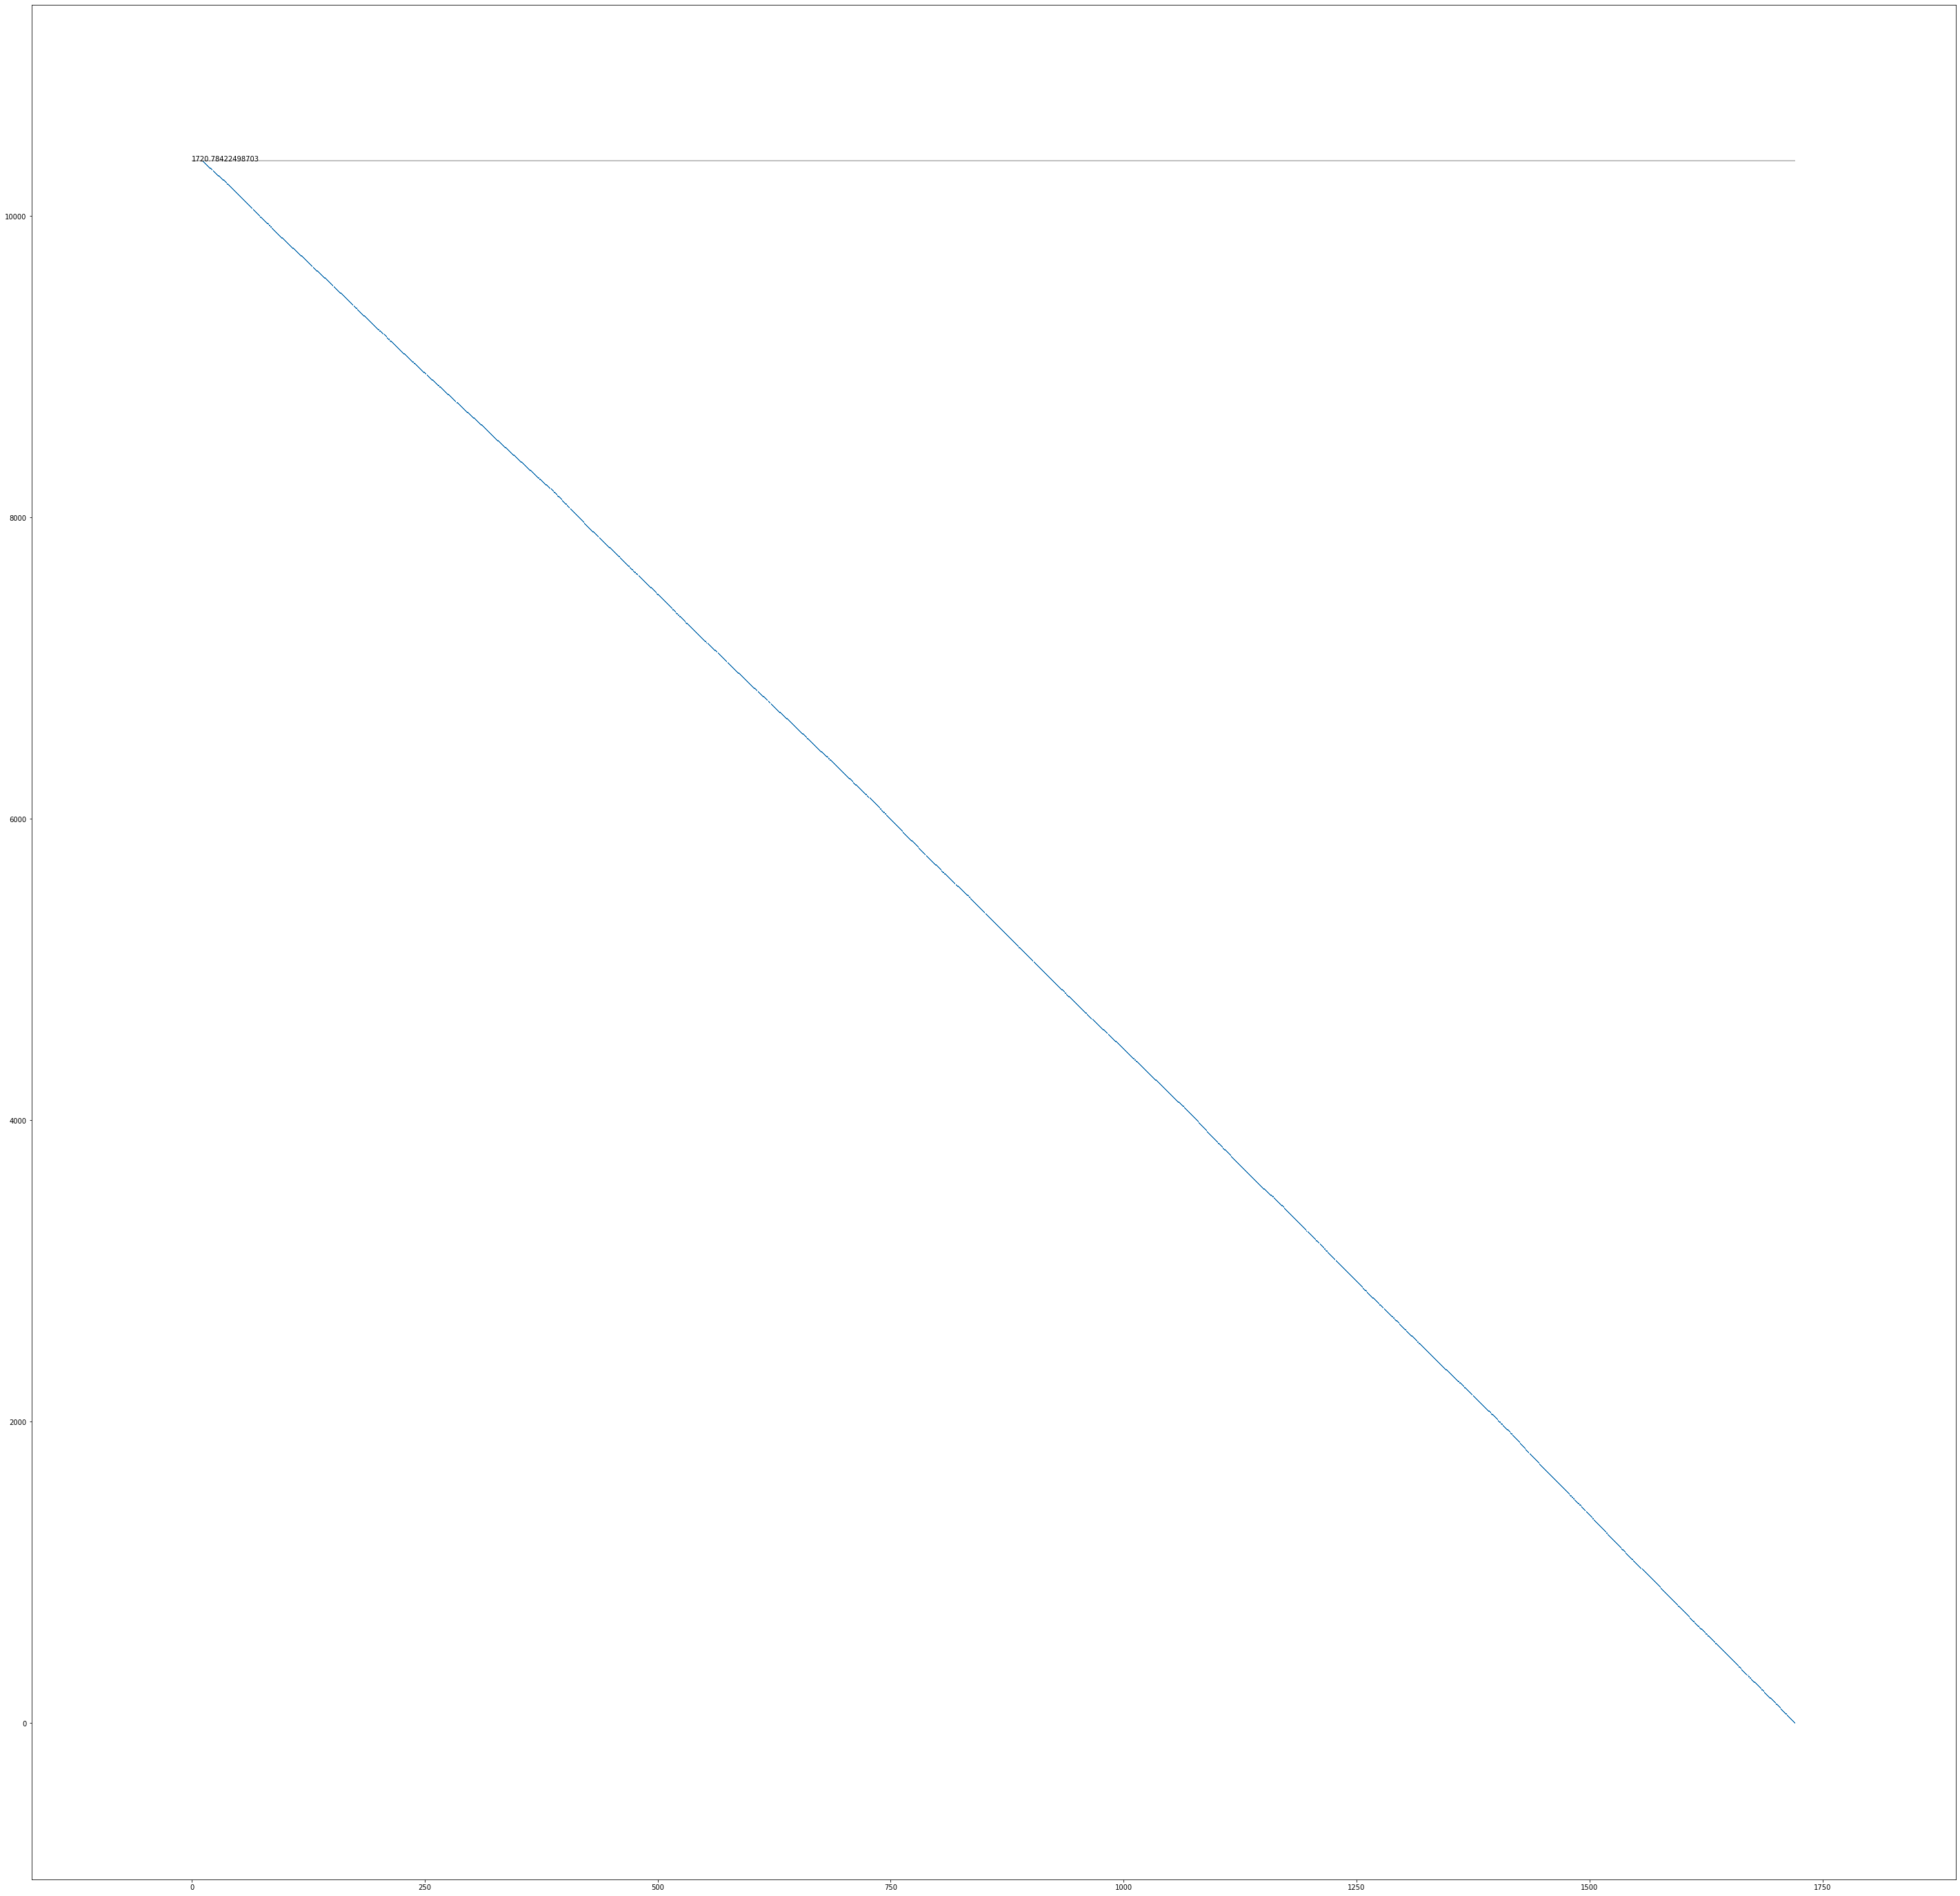

In [30]:
run = df_dataloader_vanilla[(df_dataloader_vanilla["num_workers"]==0) & 
                             (df_dataloader_vanilla["batch_size"]==64)]["run"].iloc[0]
len(run)
plot_events_timeline_detailed(df_dataloader_vanilla[df_dataloader_vanilla["run"]==run], 
                              filter_function="__getitem__")


### Threaded best run 

In [31]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(s3_both.sort_values(["t_rate"], ascending=False).head())

    batch_size  num_fetch_workers  num_workers  a_rate  a_gpu  t_rate  \
16       512.0               16.0          4.0   144.2   57.5   146.5   
17       512.0               16.0          8.0   144.5   57.5   142.2   
18       512.0               16.0         16.0   143.0   49.5   138.1   
19       512.0               16.0         32.0   136.5   34.0   130.5   
1         64.0               16.0          4.0   132.0   26.5   119.1   

      t_gpu  v_rate   v_gpu  
16  48.5000    25.5  39.500  
17  51.5000    26.5  38.000  
18  57.5000    26.5  57.500  
19  55.0000    25.8  27.000  
1   31.6875    49.3  28.625  


22528
Lines num: 22546


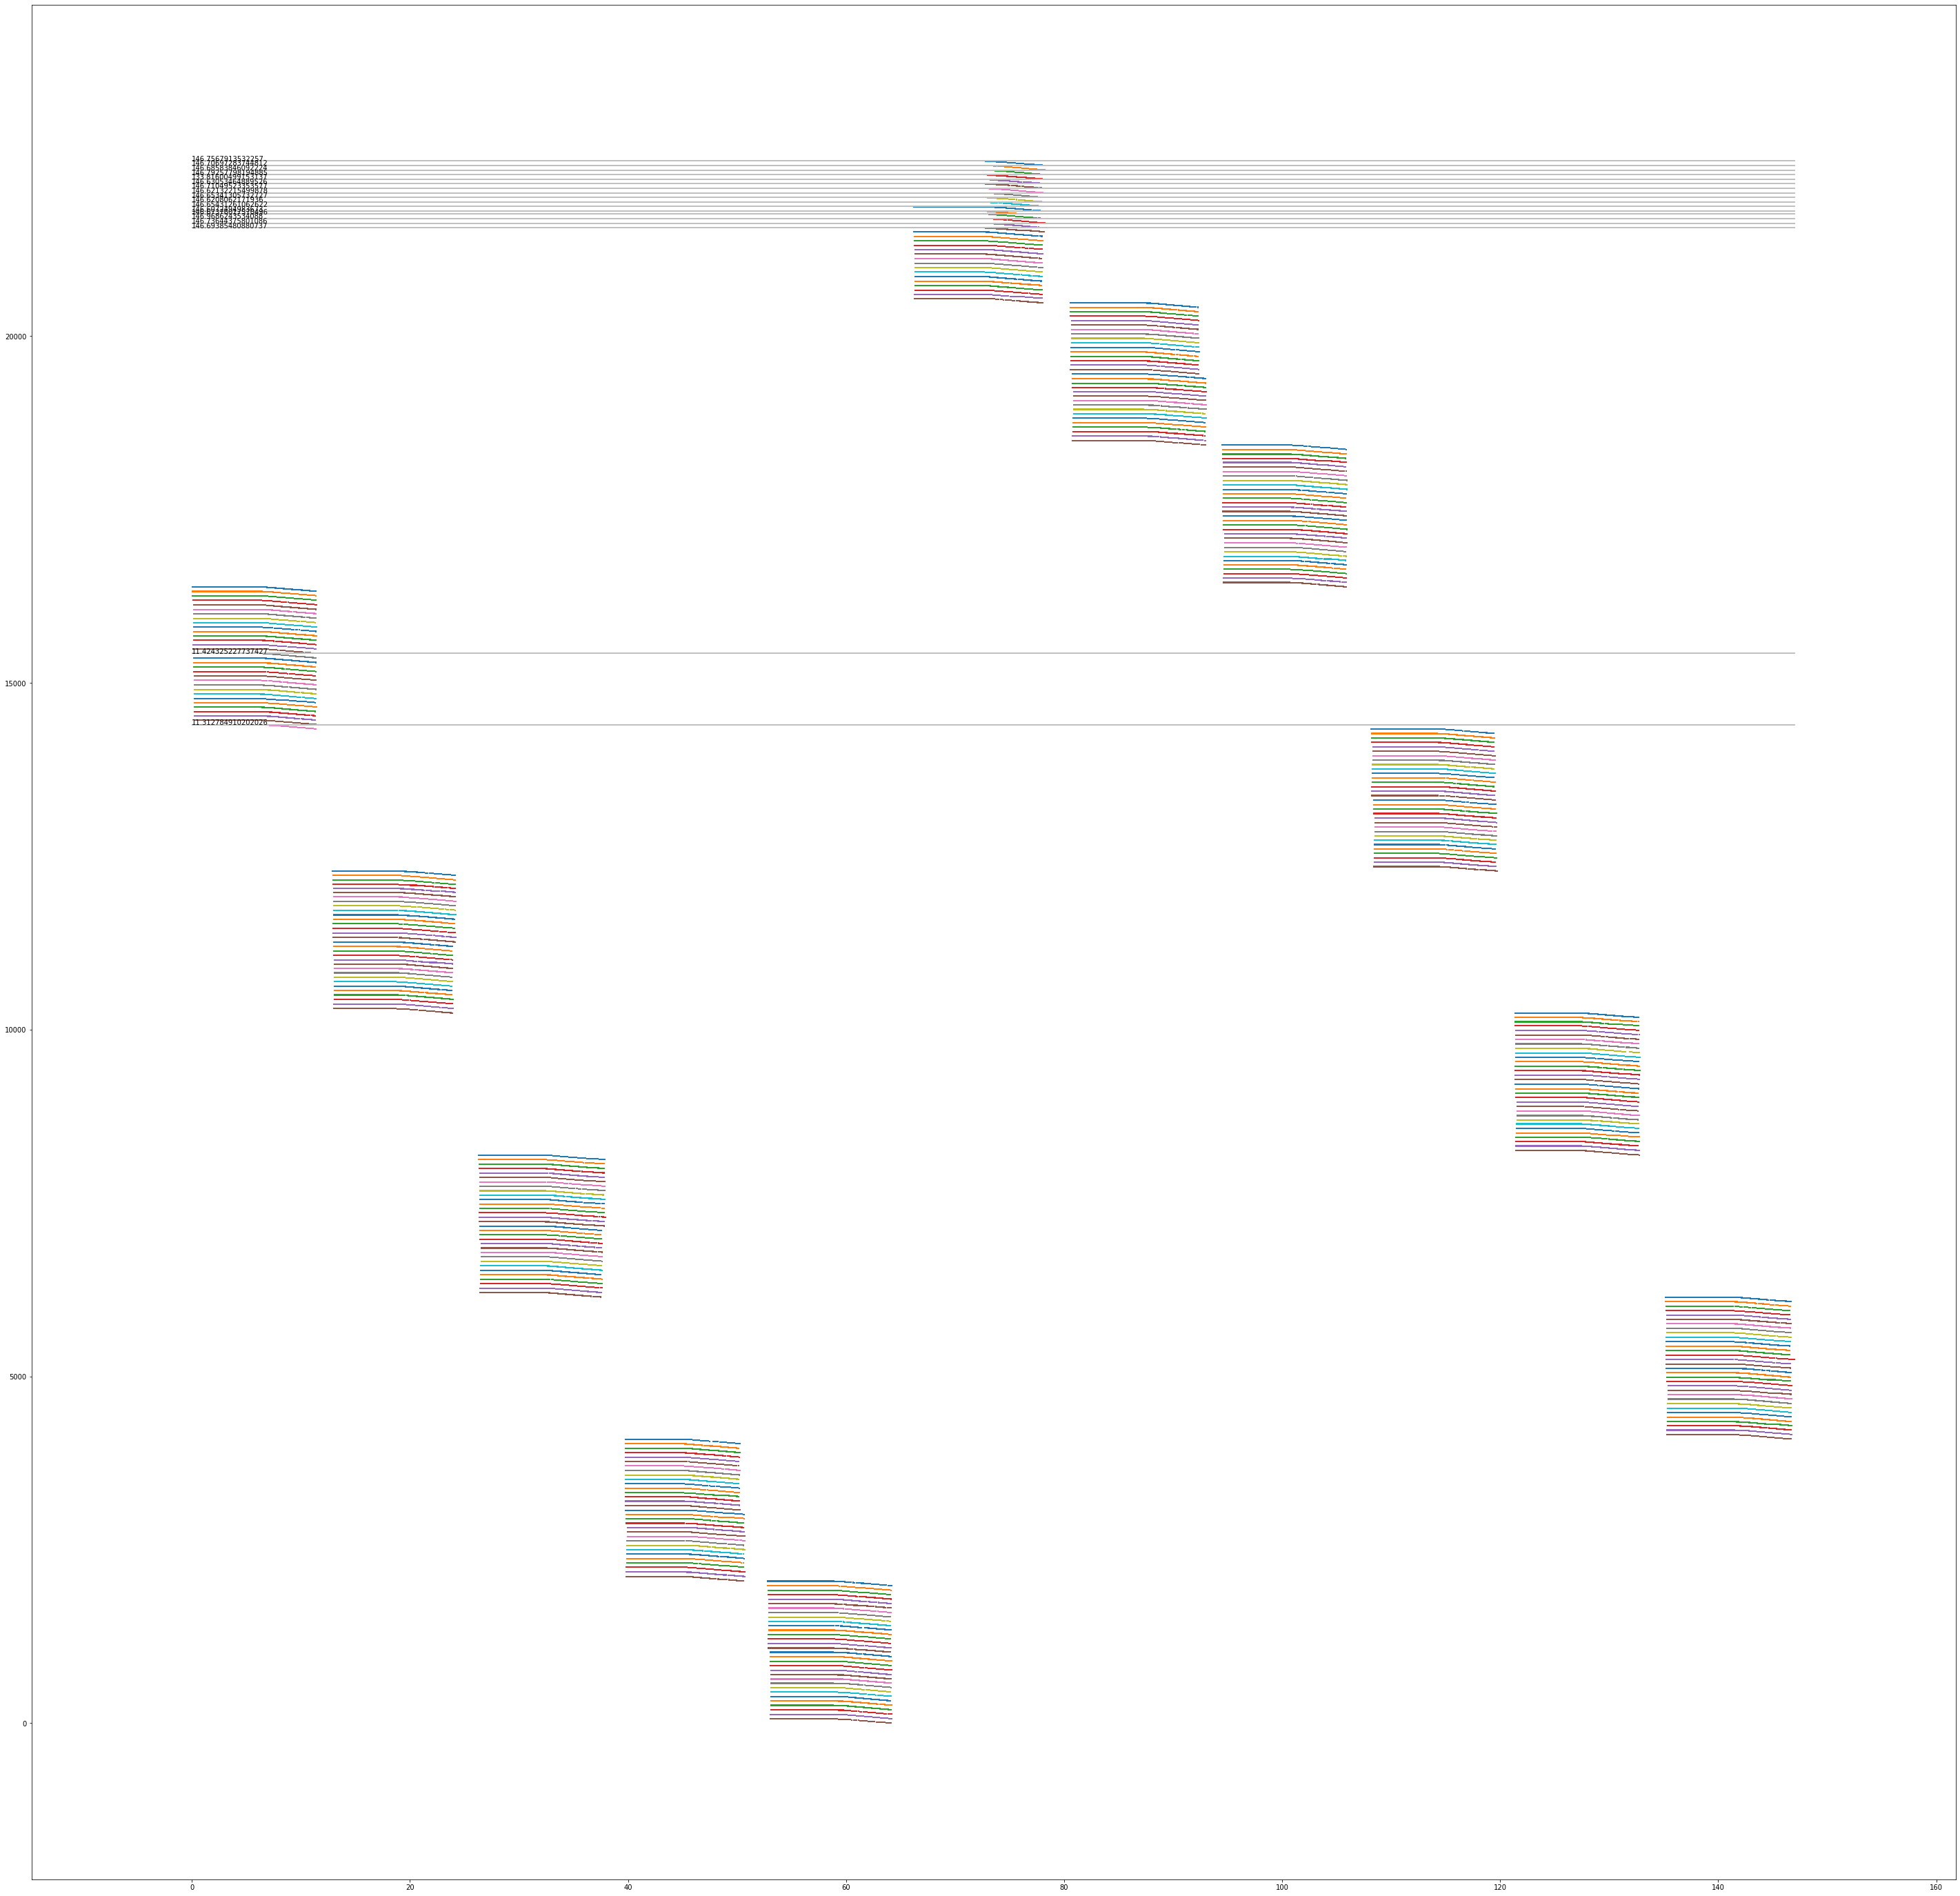

In [32]:
run = df_dataloader_threaded[(df_dataloader_threaded["batch_size"]==512) & 
                             (df_dataloader_threaded["num_workers"]==4)]["run"].iloc[0]
plot_events_timeline_detailed(df_dataloader_threaded[df_dataloader_threaded["run"]==run], filter_function="__getitem__")

### Threaded worst run 

In [33]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(s3_both.sort_values(["t_rate"], ascending=True).head())

   batch_size  num_fetch_workers  num_workers  a_rate    a_gpu  t_rate  \
4        64.0               16.0         32.0    45.0  34.2500    40.1   
3        64.0               16.0         16.0    45.1  25.8125    40.6   
9       128.0               16.0         32.0    80.3  57.6250    74.0   
8       128.0               16.0         16.0    86.6  66.3750    76.0   
2        64.0               16.0          8.0    82.6  36.7500    76.4   

     t_gpu  v_rate    v_gpu  
4  48.8750   134.9  47.9375  
3  35.0625   142.0  45.5000  
9  52.8750    89.2  66.2500  
8  58.5000    92.8  54.6250  
2  43.3750    94.6  38.0000  


22528
Lines num: 22601


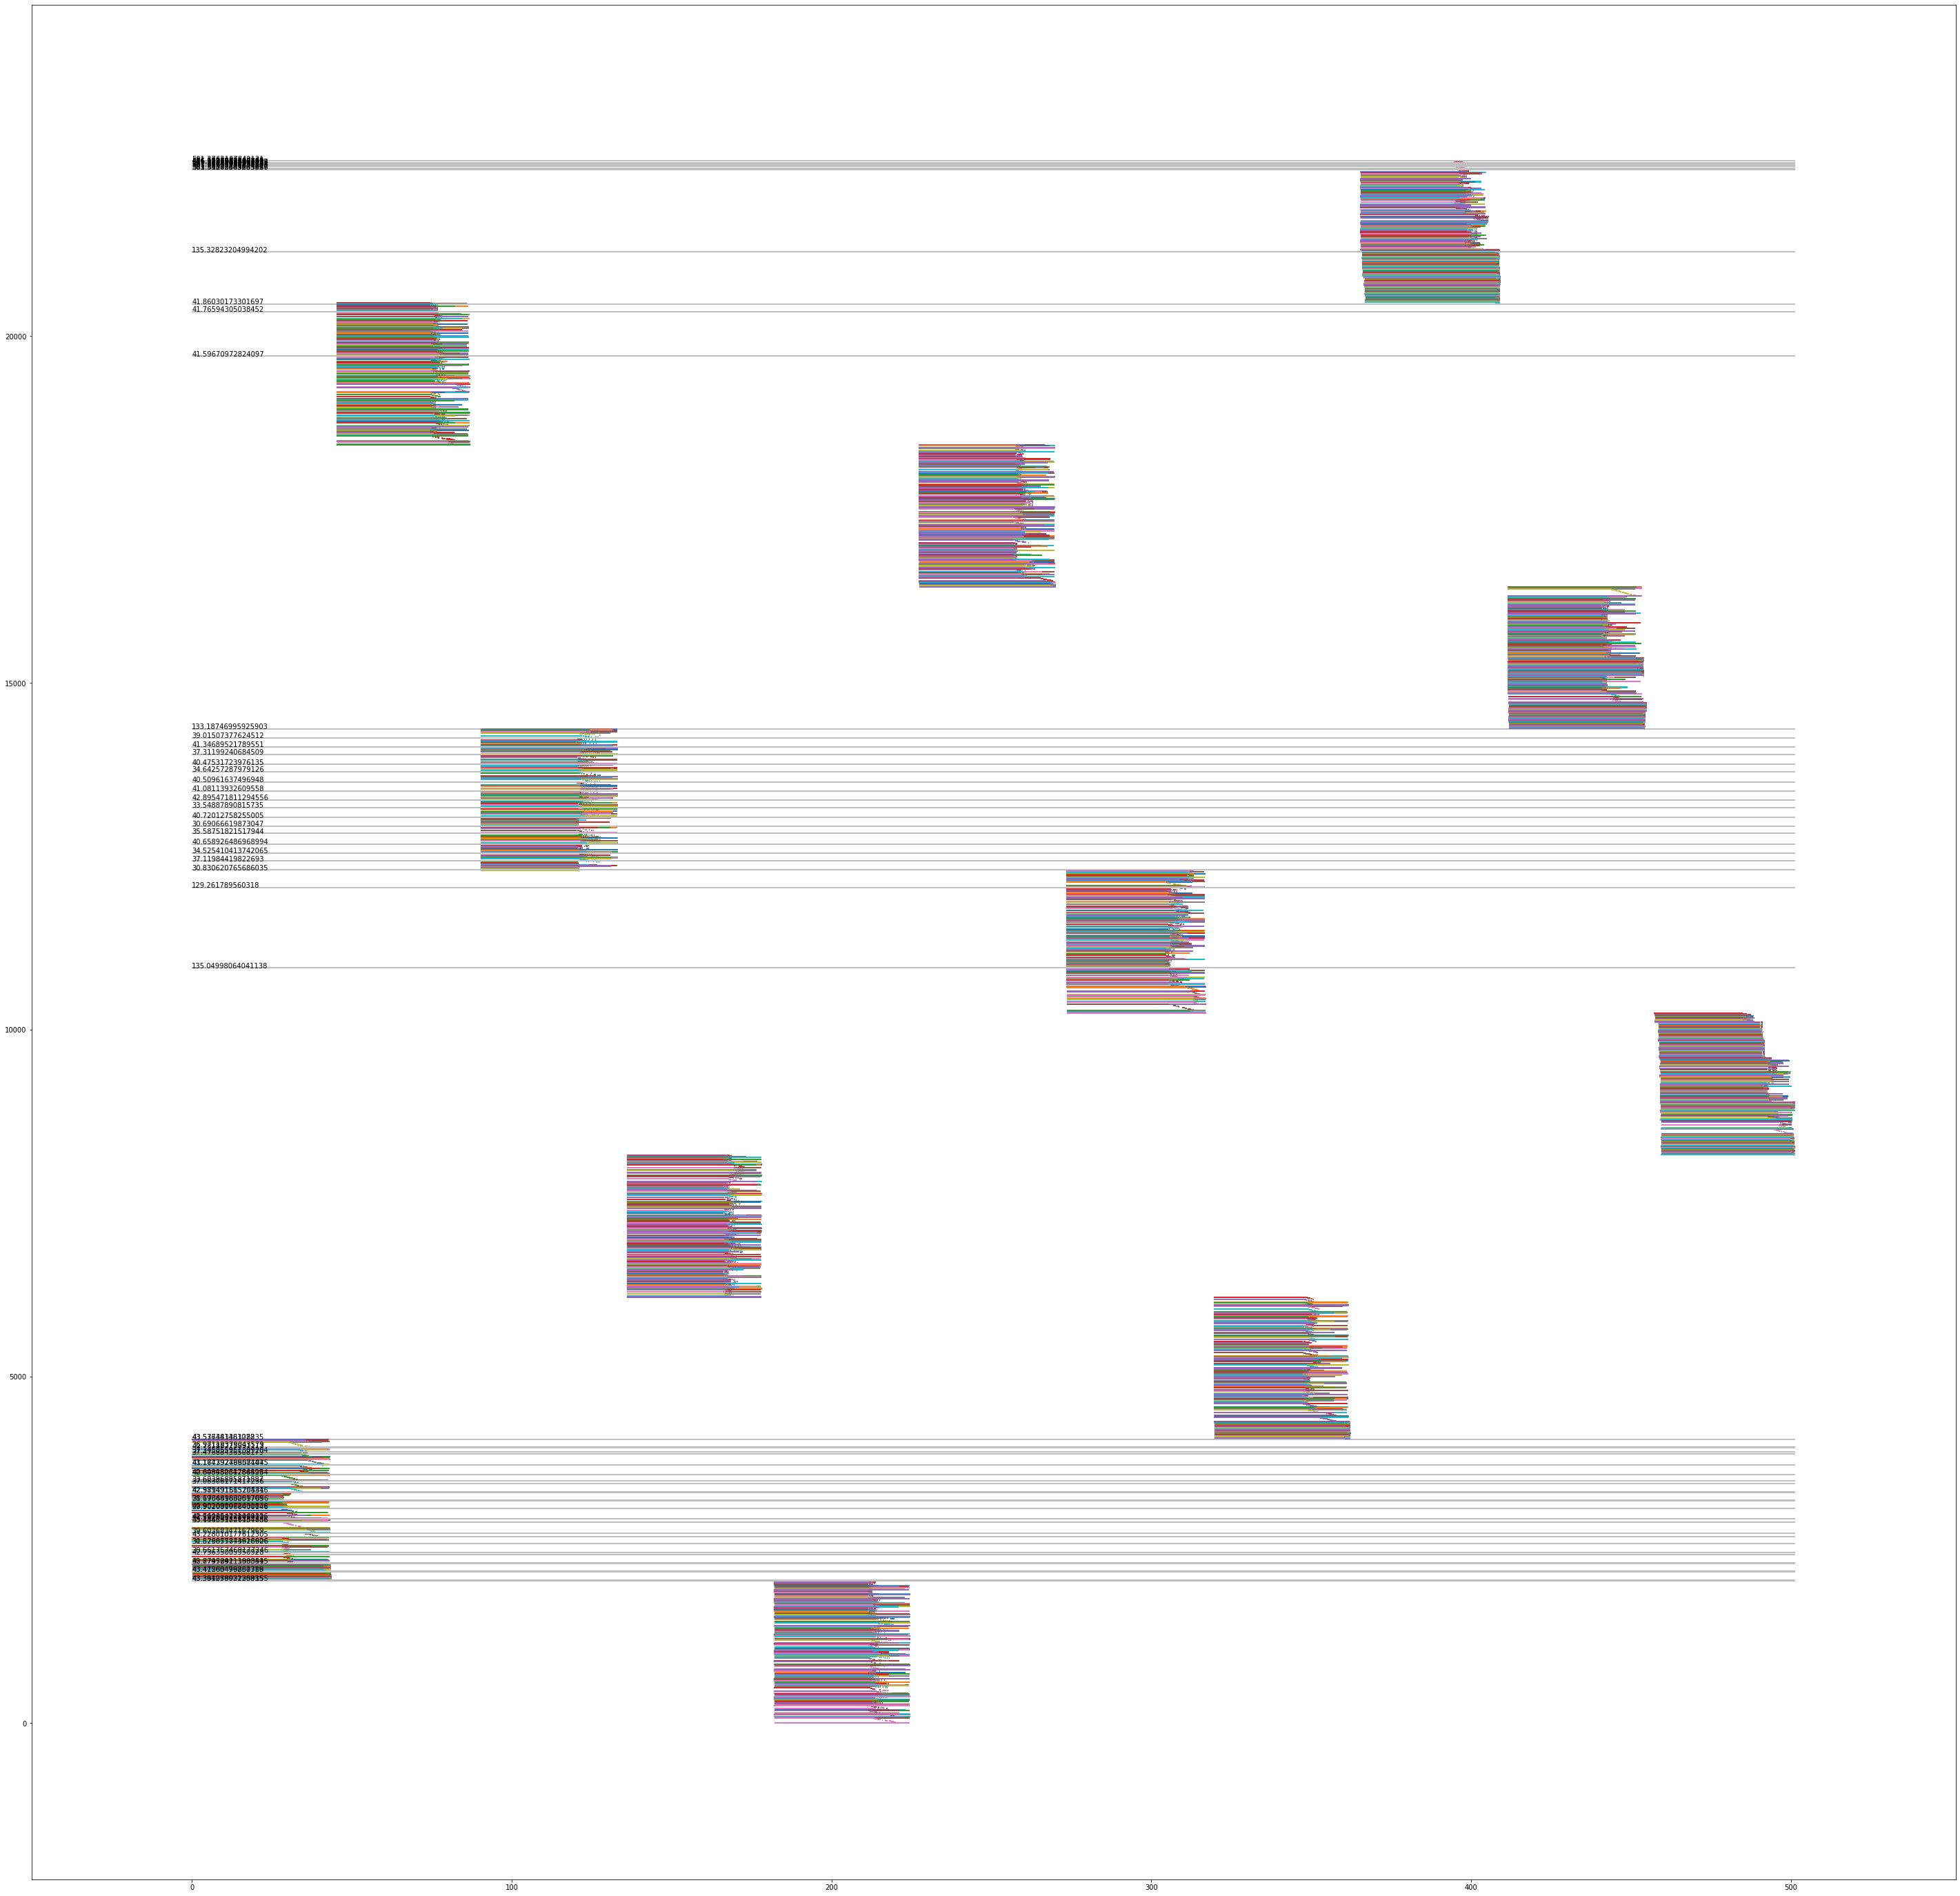

In [34]:
run = df_dataloader_threaded[(df_dataloader_threaded["batch_size"]==64) & 
                          (df_dataloader_threaded["num_workers"]==32)]["run"].iloc[0]
plot_events_timeline_detailed(df_dataloader_threaded[df_dataloader_threaded["run"]==run], filter_function="__getitem__")

### Asyncio best run 

In [35]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(s3_both.sort_values(["a_rate"], ascending=False).head())

    batch_size  num_fetch_workers  num_workers  a_rate  a_gpu  t_rate  t_gpu  \
17       512.0               16.0          8.0   144.5  57.50   142.2  51.50   
16       512.0               16.0          4.0   144.2  57.50   146.5  48.50   
18       512.0               16.0         16.0   143.0  49.50   138.1  57.50   
6        128.0               16.0          4.0   138.9  41.25   118.3  54.25   
19       512.0               16.0         32.0   136.5  34.00   130.5  55.00   

    v_rate   v_gpu  
17    26.5  38.000  
16    25.5  39.500  
18    26.5  57.500  
6     50.6  58.875  
19    25.8  27.000  


22528
Lines num: 22552


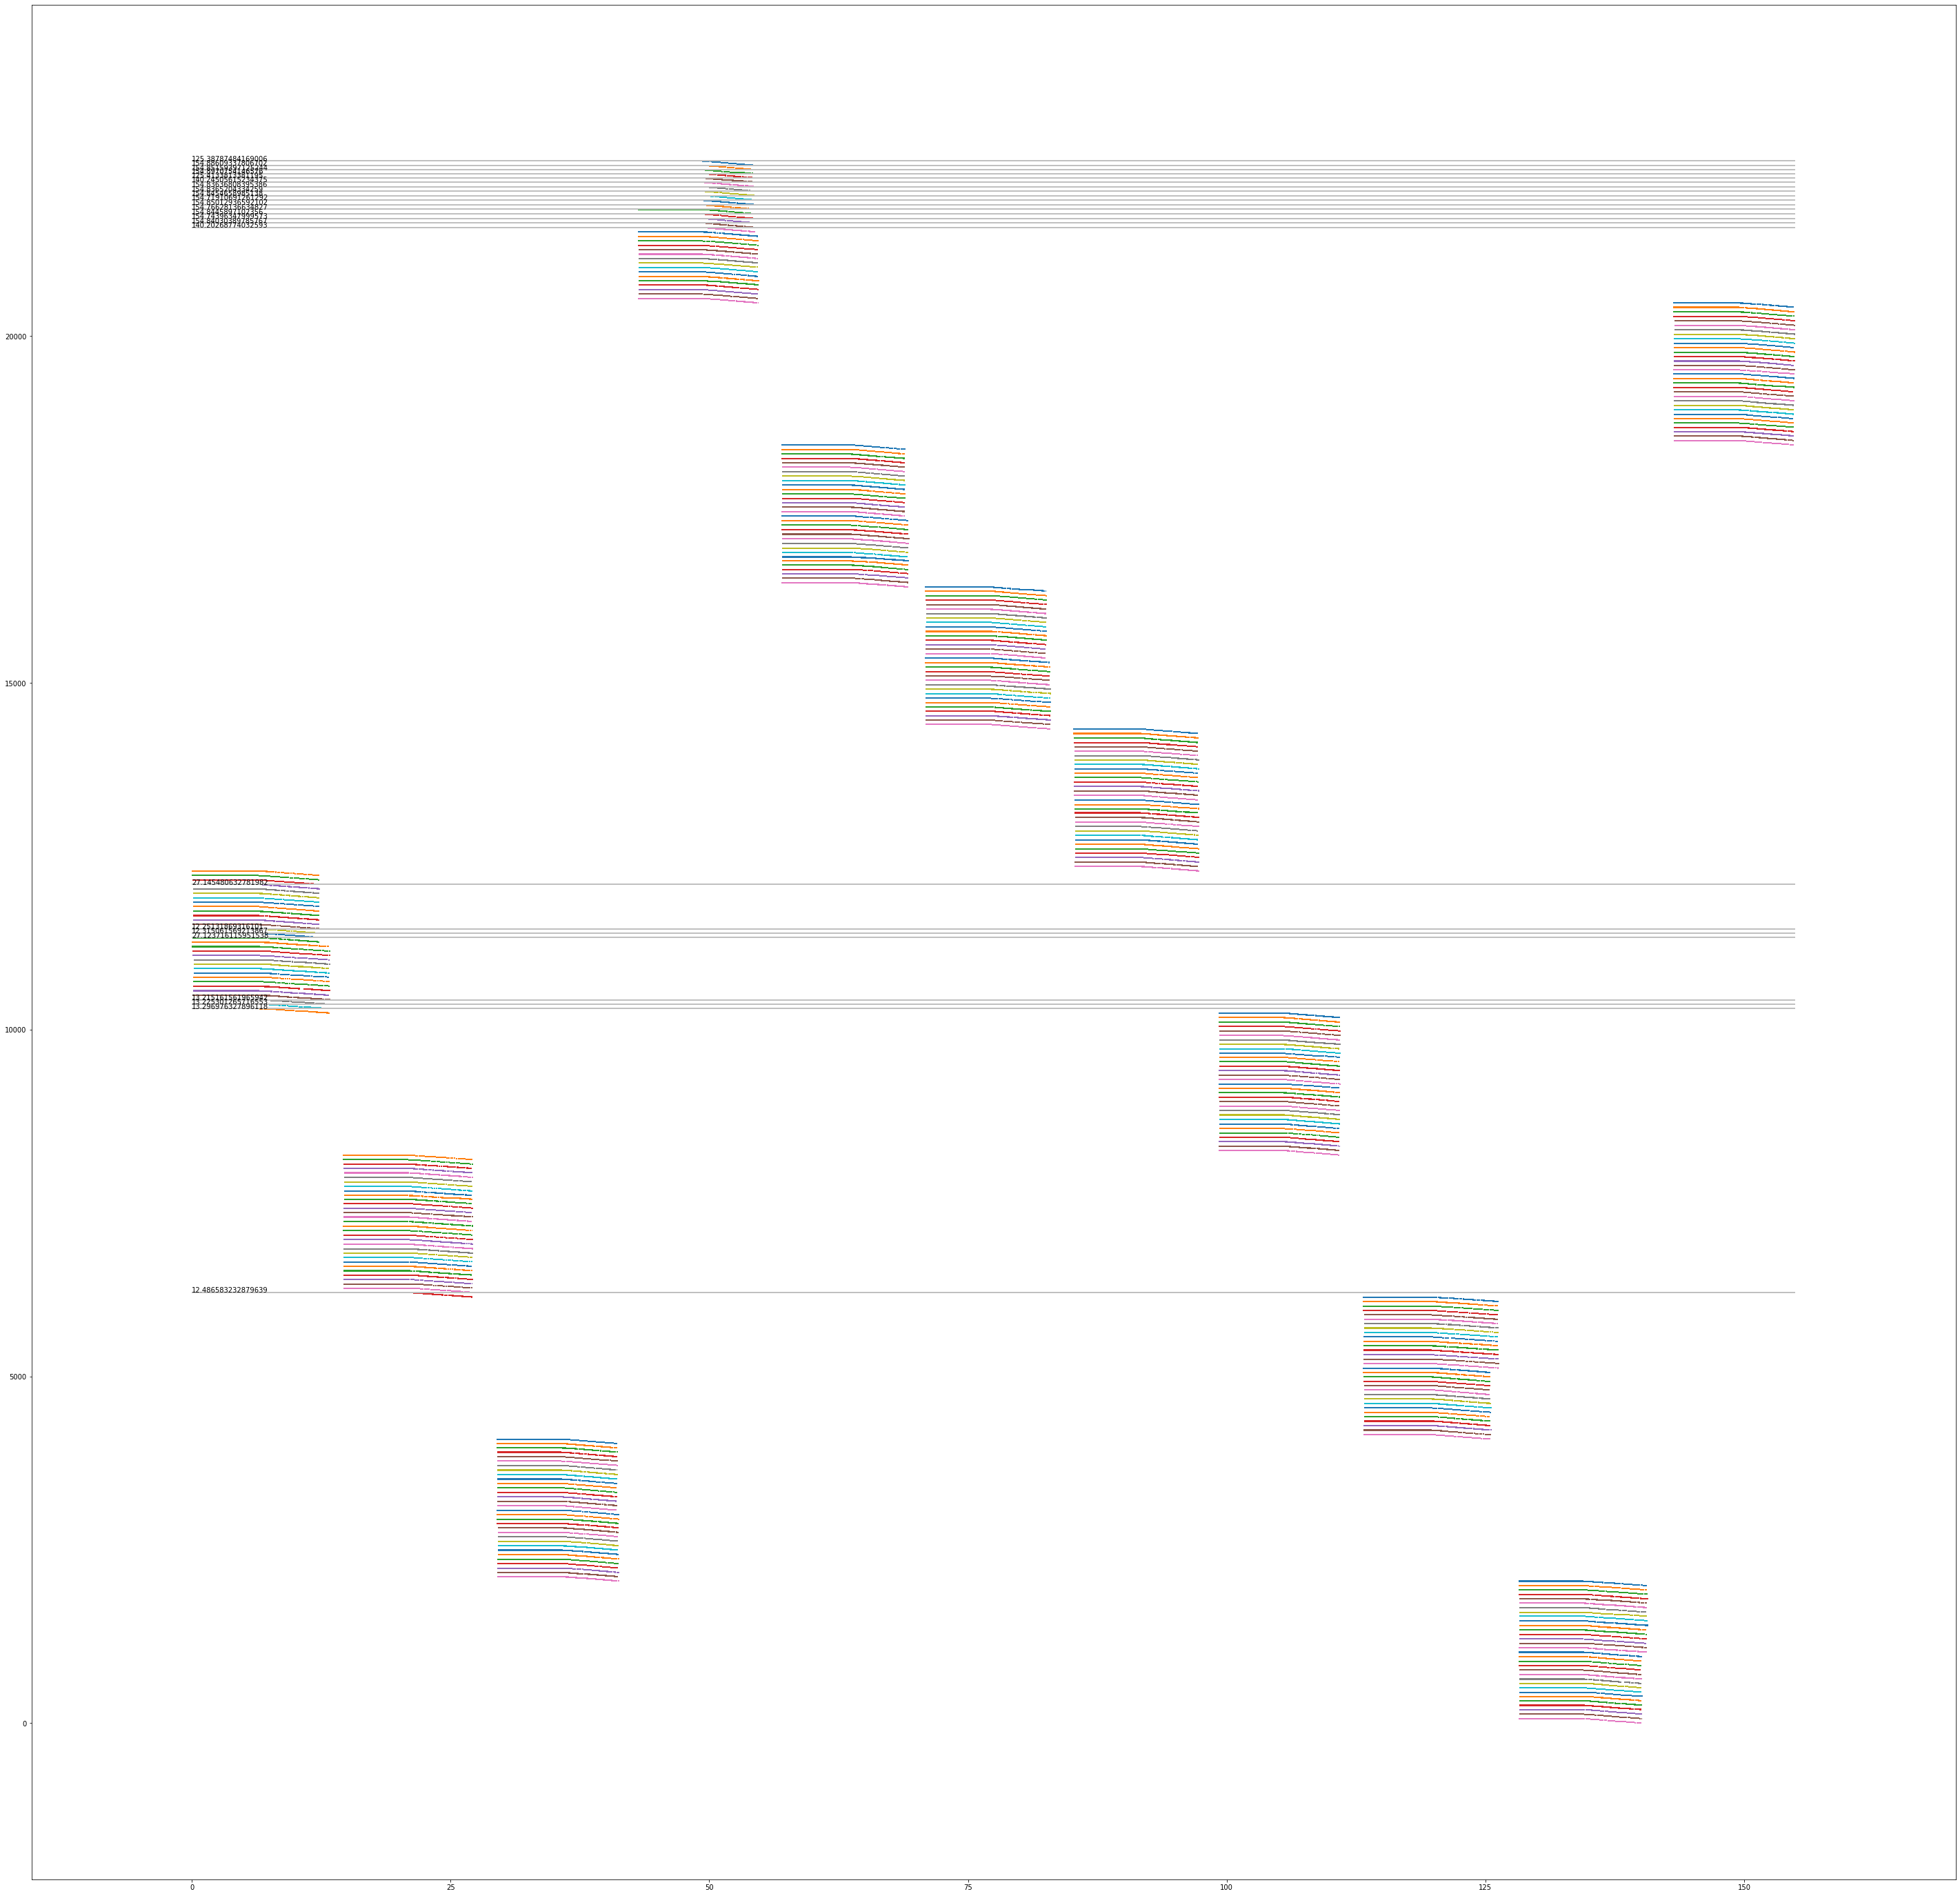

In [36]:
run = df_dataloader_s3_async[(df_dataloader_s3_async["batch_size"]==512) & 
                                (df_dataloader_s3_async["num_workers"]==8)]["run"].iloc[0]
plot_events_timeline_detailed(df_dataloader_s3_async[df_dataloader_s3_async["run"]==run], filter_function="__getitem__")

### Asyncio worst run

In [37]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(s3_both.sort_values(["a_rate"], ascending=True).head())

    batch_size  num_fetch_workers  num_workers  a_rate    a_gpu  t_rate  \
4         64.0               16.0         32.0    45.0  34.2500    40.1   
3         64.0               16.0         16.0    45.1  25.8125    40.6   
0         64.0               16.0          0.0    54.5  21.4375    93.3   
5        128.0               16.0          0.0    62.9  33.0000    98.9   
10       256.0               16.0          0.0    68.9  29.5000   104.1   

      t_gpu  v_rate    v_gpu  
4   48.8750   134.9  47.9375  
3   35.0625   142.0  45.5000  
0   22.6250     6.1  15.8750  
5   43.2500     6.7  47.5000  
10  44.7500     6.8  38.7500  


22528
Lines num: 22603


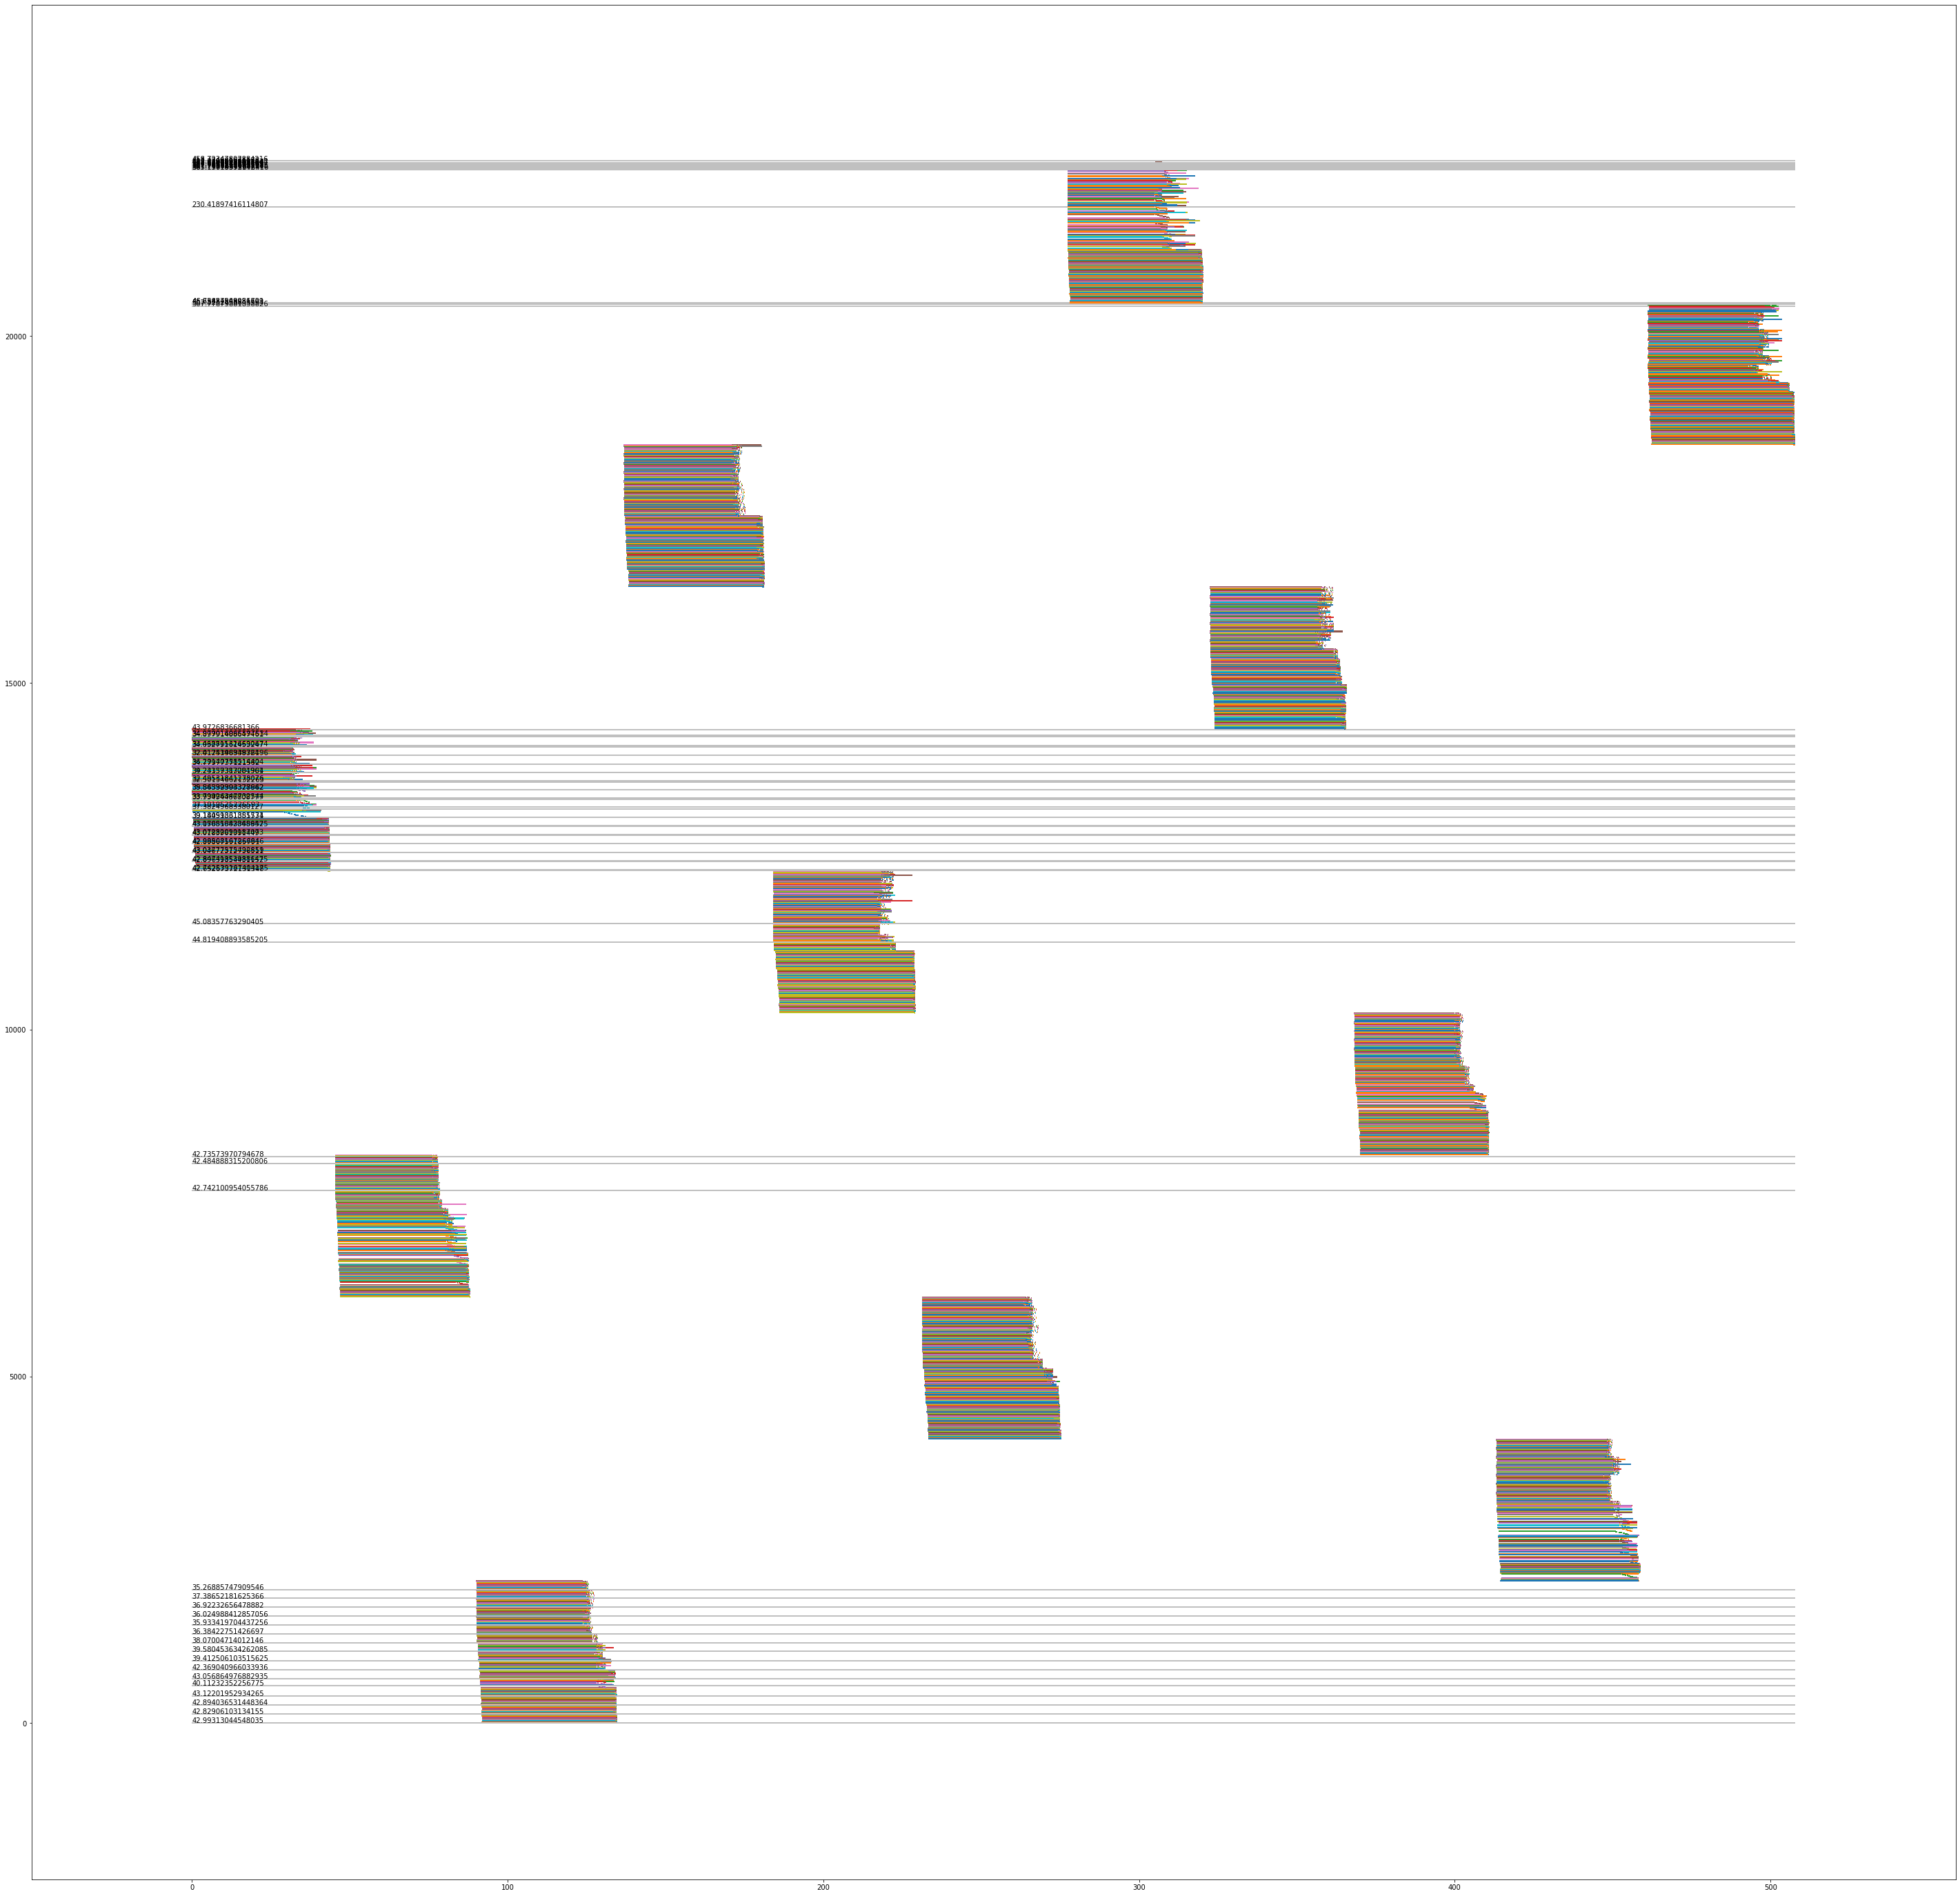

In [38]:
run = df_dataloader_s3_async[(df_dataloader_s3_async["batch_size"]==64) & 
                                (df_dataloader_s3_async["num_workers"]==32)]["run"].iloc[0]
plot_events_timeline_detailed(df_dataloader_s3_async[df_dataloader_s3_async["run"]==run], filter_function="__getitem__")

### Vanilla best

In [39]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(s3_both.sort_values(["v_rate"], ascending=False).head())

   batch_size  num_fetch_workers  num_workers  a_rate    a_gpu  t_rate  \
3        64.0               16.0         16.0    45.1  25.8125    40.6   
4        64.0               16.0         32.0    45.0  34.2500    40.1   
2        64.0               16.0          8.0    82.6  36.7500    76.4   
7       128.0               16.0          8.0    87.0  64.1250    77.8   
8       128.0               16.0         16.0    86.6  66.3750    76.0   

     t_gpu  v_rate    v_gpu  
3  35.0625   142.0  45.5000  
4  48.8750   134.9  47.9375  
2  43.3750    94.6  38.0000  
7  57.2500    93.5  64.5000  
8  58.5000    92.8  54.6250  


22528
Lines num: 22529


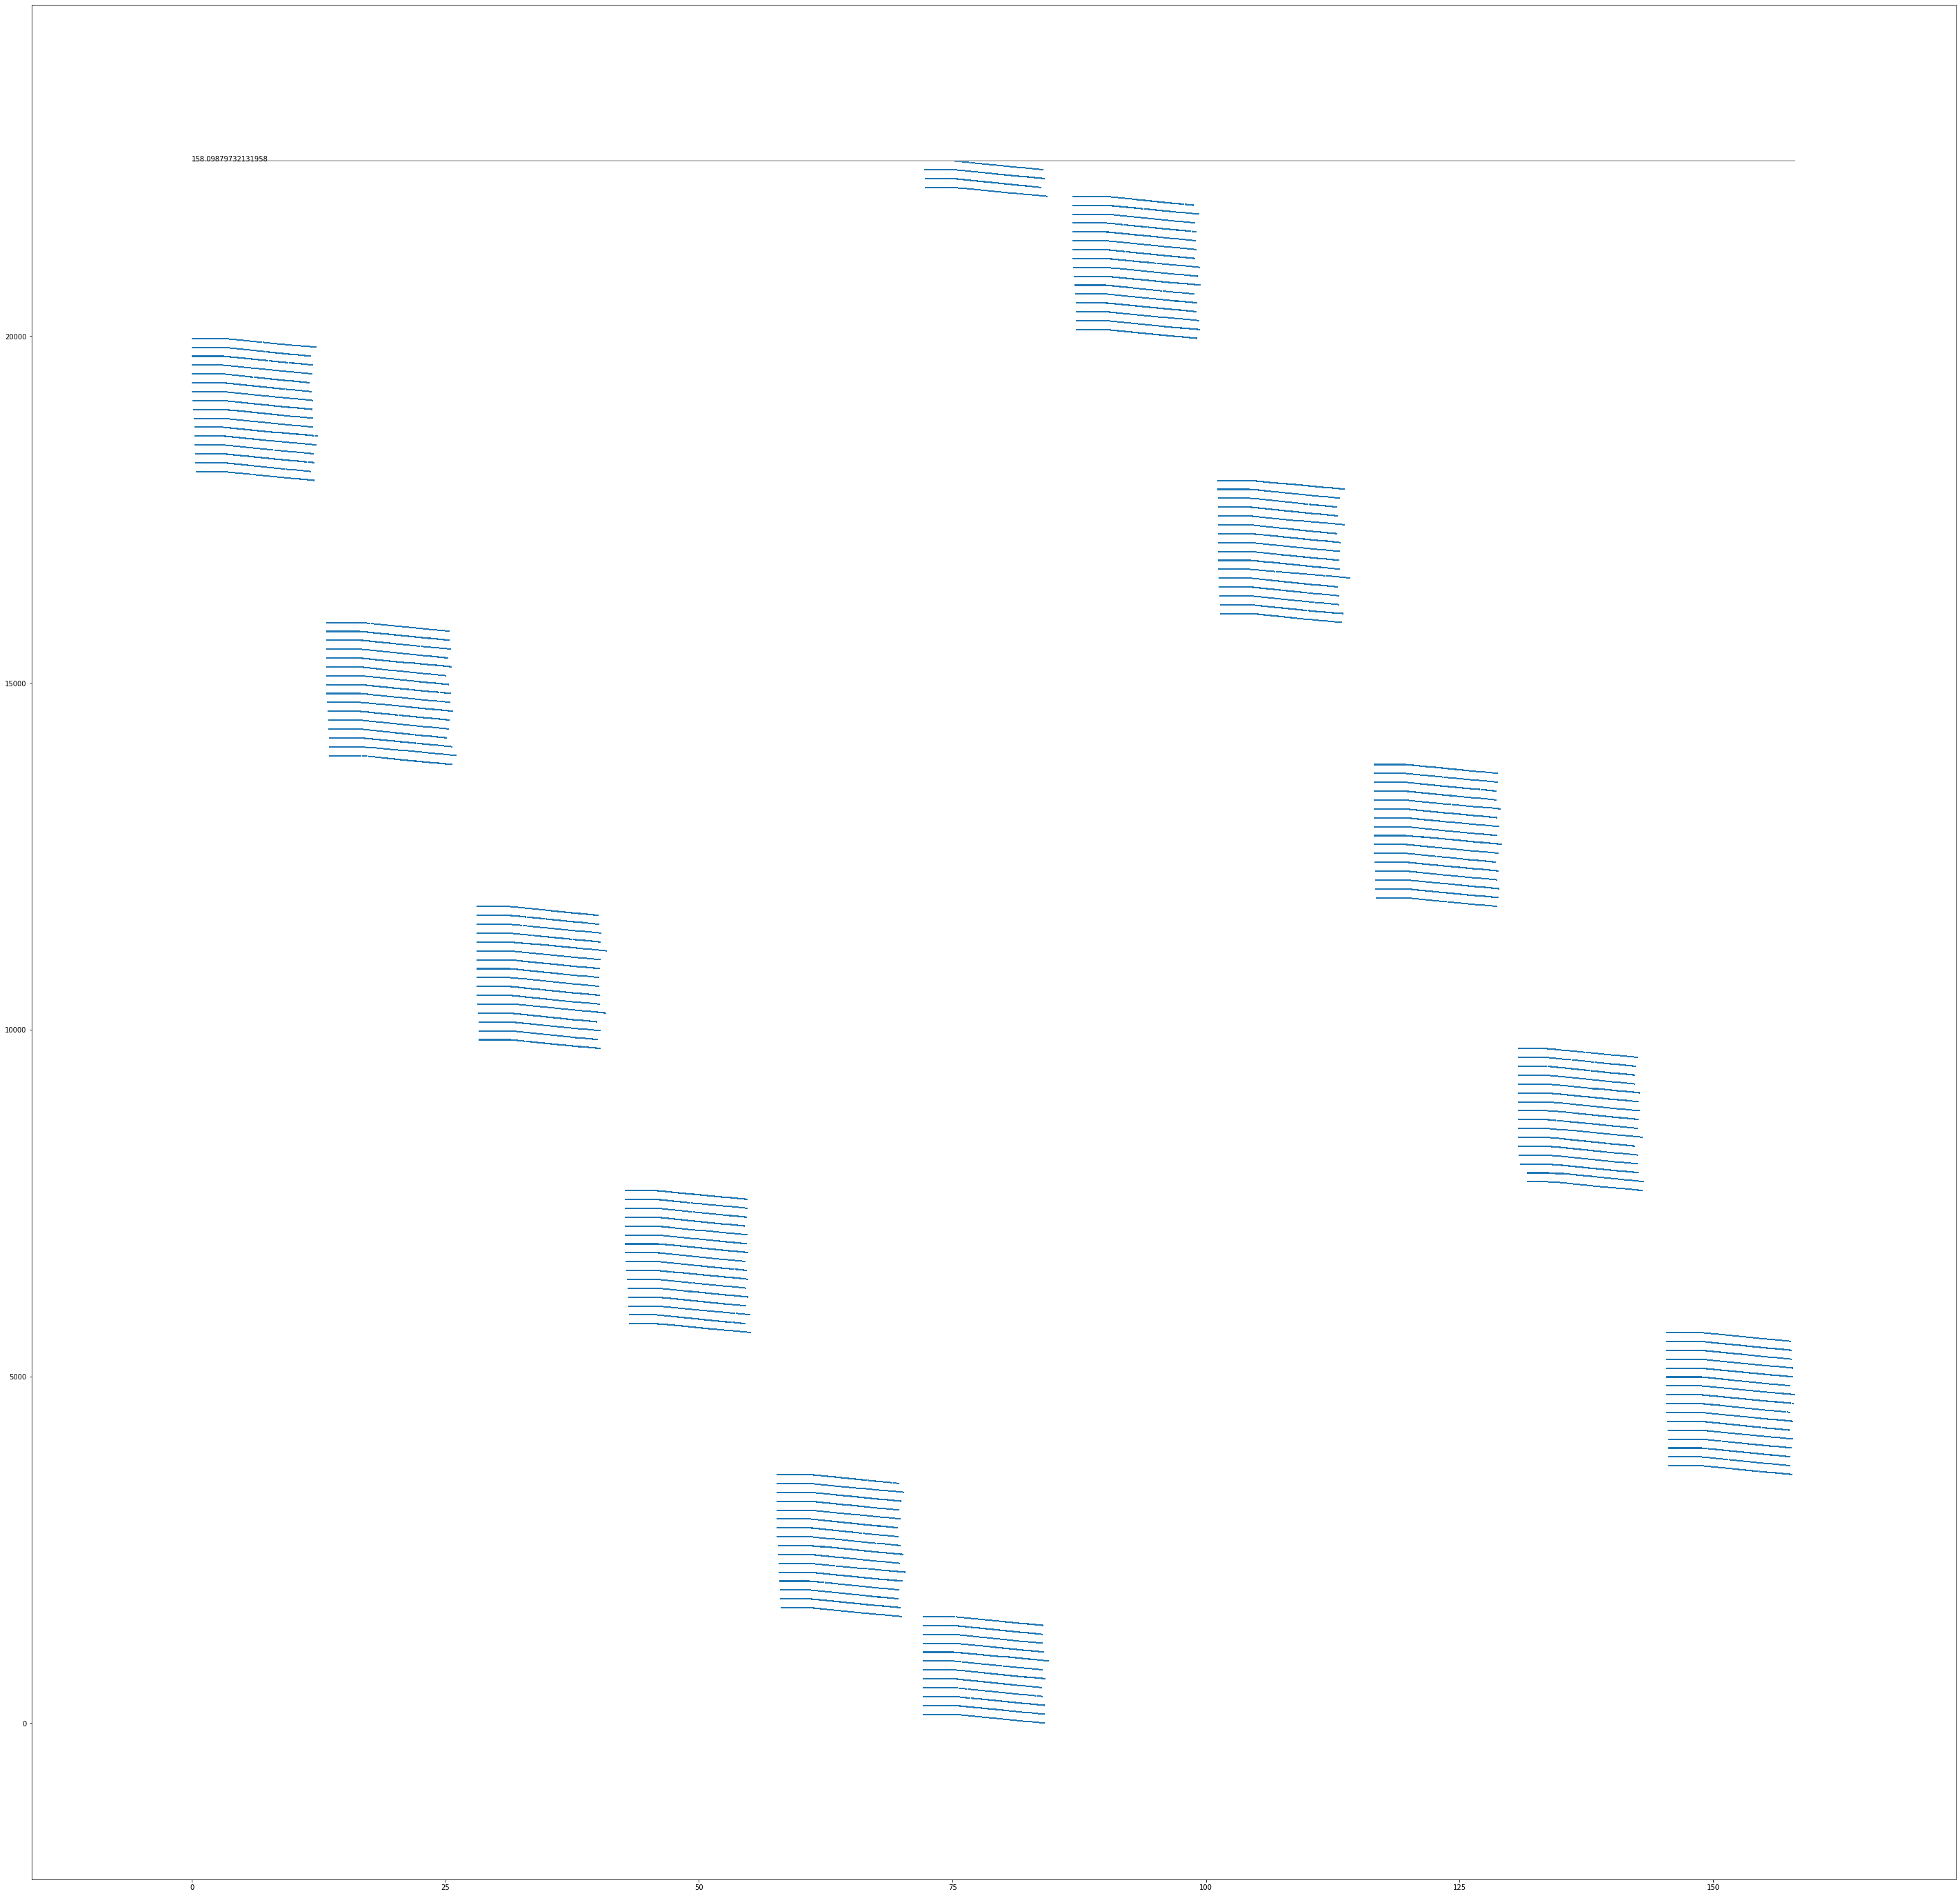

In [40]:
run = df_dataloader_s3_vanilla[(df_dataloader_s3_vanilla["batch_size"]==64) & 
                                (df_dataloader_s3_vanilla["num_workers"]==16)]["run"].iloc[0]
plot_events_timeline_detailed(df_dataloader_s3_vanilla[df_dataloader_s3_vanilla["run"]==run], filter_function="__getitem__")

In [41]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(s3_both.sort_values(["v_rate"], ascending=True).head())

    batch_size  num_fetch_workers  num_workers  a_rate    a_gpu  t_rate  \
0         64.0               16.0          0.0    54.5  21.4375    93.3   
15       512.0               16.0          0.0    71.8   0.0000   117.3   
5        128.0               16.0          0.0    62.9  33.0000    98.9   
10       256.0               16.0          0.0    68.9  29.5000   104.1   
16       512.0               16.0          4.0   144.2  57.5000   146.5   

     t_gpu  v_rate   v_gpu  
0   22.625     6.1  15.875  
15  45.500     6.7  70.000  
5   43.250     6.7  47.500  
10  44.750     6.8  38.750  
16  48.500    25.5  39.500  


10368
Lines num: 10369


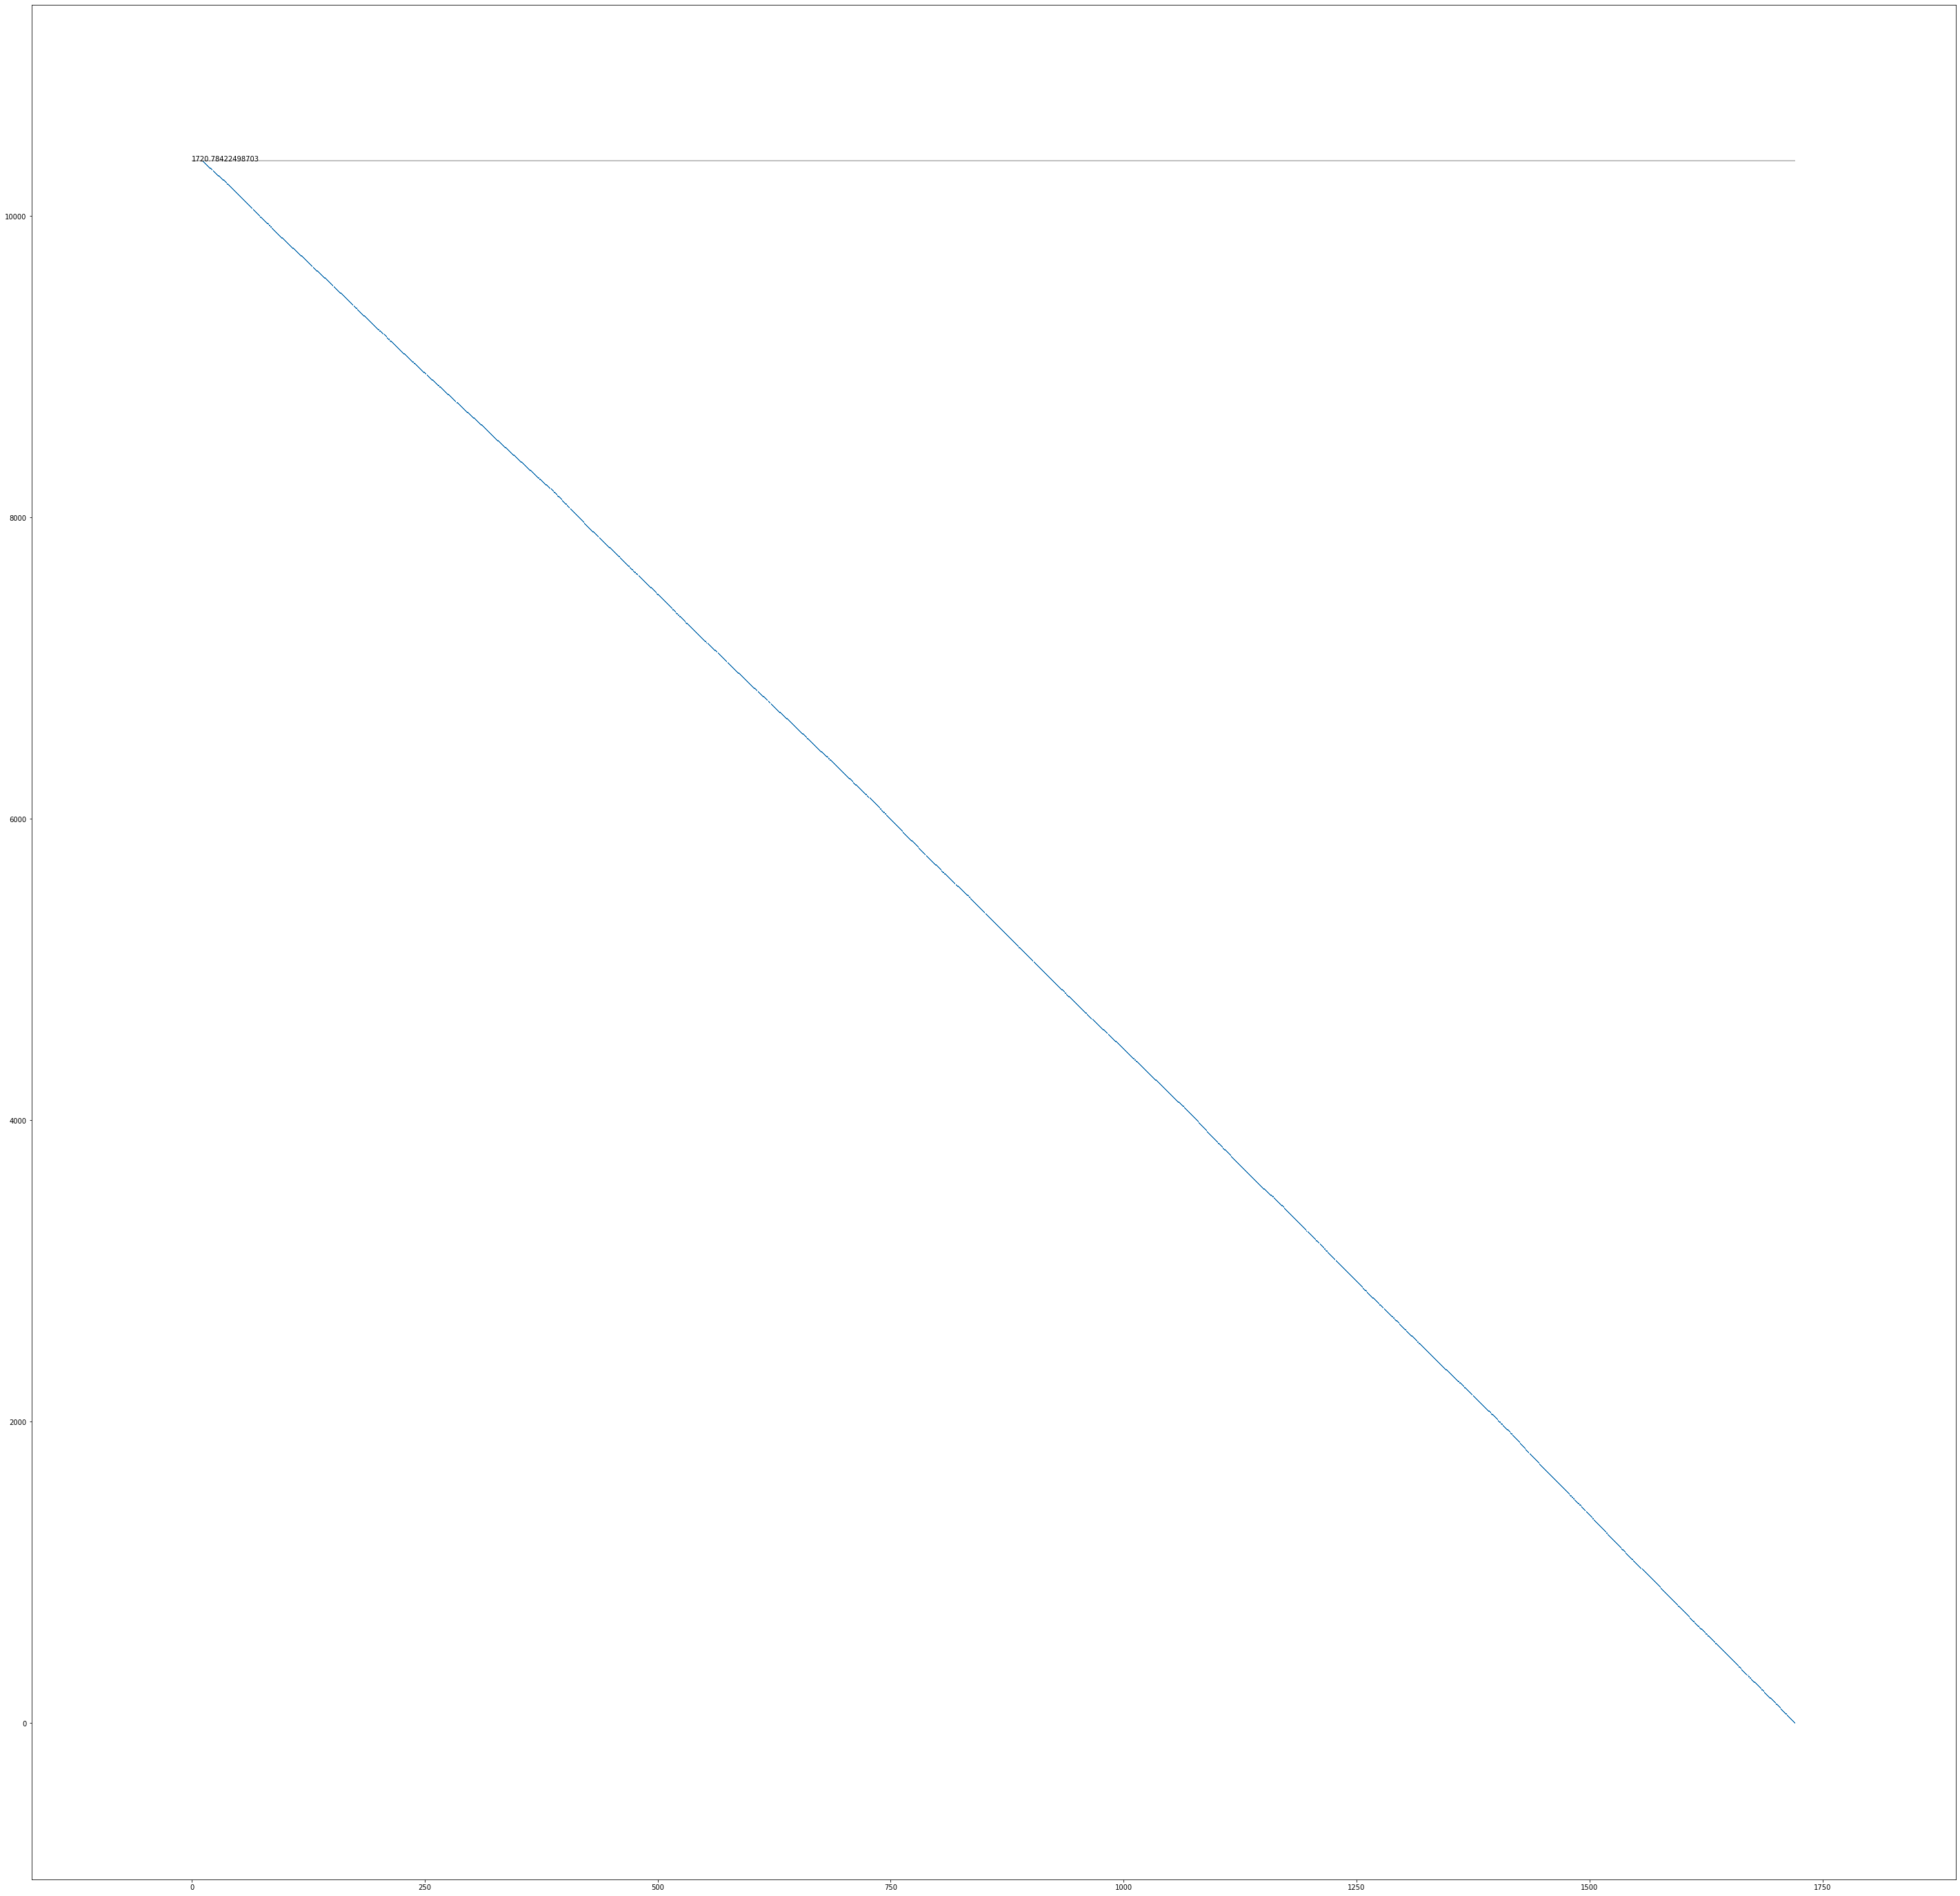

In [42]:
run = df_dataloader_s3_vanilla[(df_dataloader_s3_vanilla["batch_size"]==64) & 
                                (df_dataloader_s3_vanilla["num_workers"]==0)]["run"].iloc[0]
plot_events_timeline_detailed(df_dataloader_s3_vanilla[df_dataloader_s3_vanilla["run"]==run], filter_function="__getitem__")

### RATE

In [43]:
def plot_stats(d1):   
    fig, ax = plt.subplots(figsize=(15, 10))
#     ax.axis(ymin=0.003, ymax=0.012)
    for i, (batch_size, color) in enumerate(zip([64, 128, 256, 512], ["red", "gray", "lime", "aqua"])):
        s3_fix_1 = d1[(d1["num_fetch_workers"]==16) & (d1["batch_size"]==batch_size)]
        s3_fix_1 = s3_fix_1.sort_values(["num_workers"], ascending=True)

        if i == 0:
            xrange = s3_fix_1["num_workers"] - 2
        else:
            xrange = s3_fix_1["num_workers"] + i - 2
        ax.bar(x=xrange, height=s3_fix_1["a_rate"], width=0.25, color=color, label=f"A-rate, {batch_size}")
        ax.bar(x=xrange+0.3, height=s3_fix_1["t_rate"], hatch="xxx", color=color, width=0.25, label=f"T-Rate, {batch_size}")
        ax.bar(x=xrange+0.6, height=s3_fix_1["v_rate"], hatch="...", color=color, width=0.25, label=f"V-Rate, {batch_size}")

    ax.grid(linestyle='--', which="both")
    ax.set_xticks(s3_fix_1["num_workers"])

    ax.set_xlabel(f"Number of workers", loc="center")
    ax.set_ylabel("Rate", loc="top")
    ax.set_title(f"S3 Asyncio vs. Threaded vs. Vanilla Pytorch + Batch sizes", loc='center')
    ax.legend()


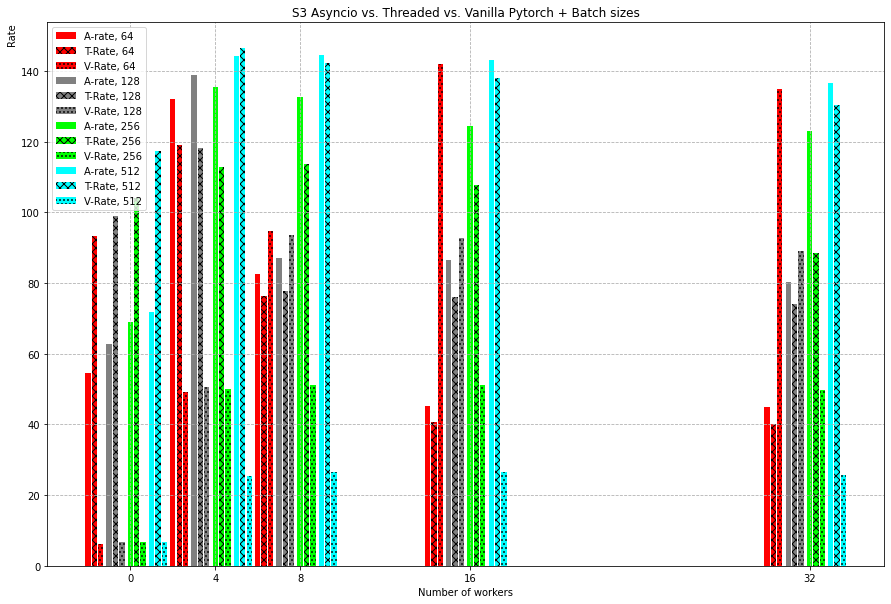

In [44]:
plot_stats(s3_both)

!!! **Vannila is good with many workers and small batches!**

In [45]:
f_df_dataloader_s3_async=df_dataloader_s3_async[df_dataloader_s3_async["function_name"]=="__getitem__"]
f_df_dataloader_s3_threaded=df_dataloader_s3_threaded[df_dataloader_s3_threaded["function_name"]=="__getitem__"]
f_df_dataloader_s3_vanilla=df_dataloader_s3_vanilla[df_dataloader_s3_vanilla["function_name"]=="__getitem__"]

In [46]:
print(np.unique(df_dataloader_s3_async["function_name"].to_numpy()))

['__getitem__' '_worker_loop' 'fetch' 'start_train' 'training_step'
 'validation_step']


In [47]:
%%javascript
    IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [48]:
# fn = "__getitem__"
def plot_stats(fn):
    for bs in [128, 256, 512]:
        f_df_dataloader_s3_async=df_dataloader_s3_async[df_dataloader_s3_async["function_name"]==fn]
        f_df_dataloader_s3_async=f_df_dataloader_s3_async[f_df_dataloader_s3_async["batch_size"]==bs]
        f_df_dataloader_s3_async=f_df_dataloader_s3_async.sort_values(["num_workers"], ascending=False)

        f_df_dataloader_s3_threaded=df_dataloader_s3_threaded[df_dataloader_s3_threaded["function_name"]==fn]
        f_df_dataloader_s3_threaded=f_df_dataloader_s3_threaded[f_df_dataloader_s3_threaded["batch_size"]==bs]
        f_df_dataloader_s3_threaded=f_df_dataloader_s3_threaded.sort_values(["num_workers"], ascending=False)

        f_df_dataloader_s3_vanilla=df_dataloader_s3_vanilla[df_dataloader_s3_vanilla["function_name"]==fn]
        f_df_dataloader_s3_vanilla=f_df_dataloader_s3_vanilla[f_df_dataloader_s3_vanilla["batch_size"]==bs]
        f_df_dataloader_s3_vanilla=f_df_dataloader_s3_vanilla.sort_values(["num_workers"], ascending=False)


        fig, ax = plt.subplots(figsize=(15, 10))
        ax.plot(range(len(f_df_dataloader_s3_async)), f_df_dataloader_s3_async["elapsed"],color="red",label="async")
        ax.plot(range(len(f_df_dataloader_s3_threaded)), f_df_dataloader_s3_threaded["elapsed"],color="blue",label="threaded")
        ax.plot(range(len(f_df_dataloader_s3_vanilla)), f_df_dataloader_s3_vanilla["elapsed"],color="green",label="vanilla")
    
        ax.set_xlabel(f"Experiment (sorted by num workers)", loc="center")
        ax.set_ylabel("Duration (s)", loc="top")
        ax.set_title(f"{fn}", loc='center')
        ax.legend()

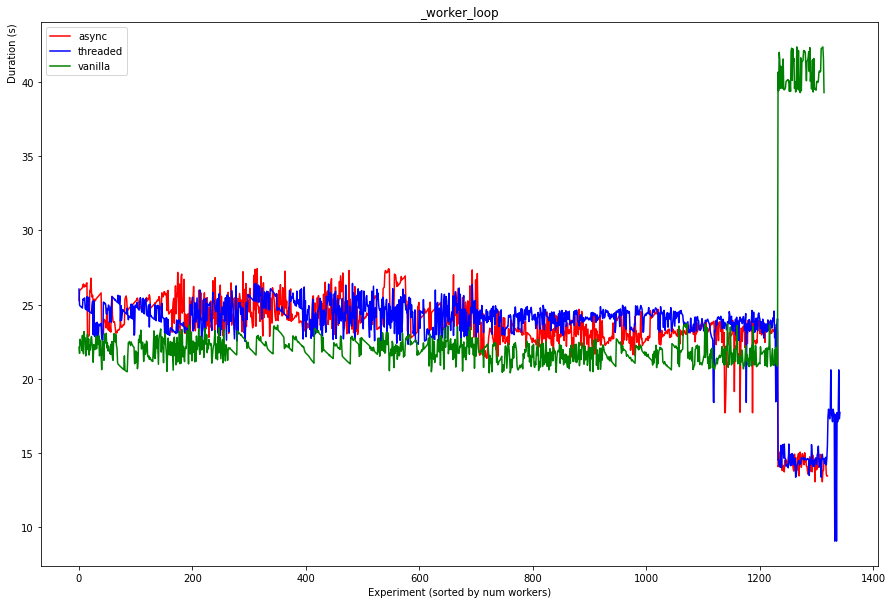

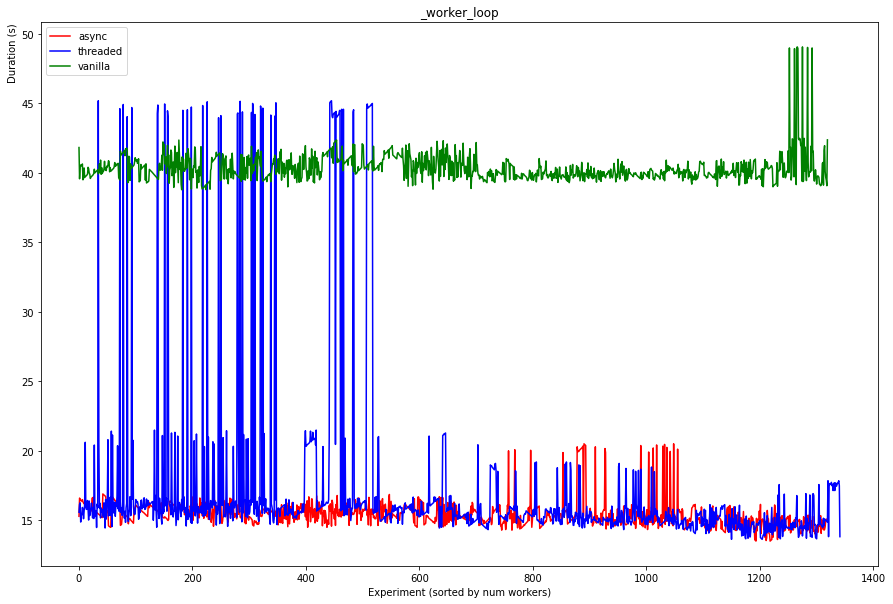

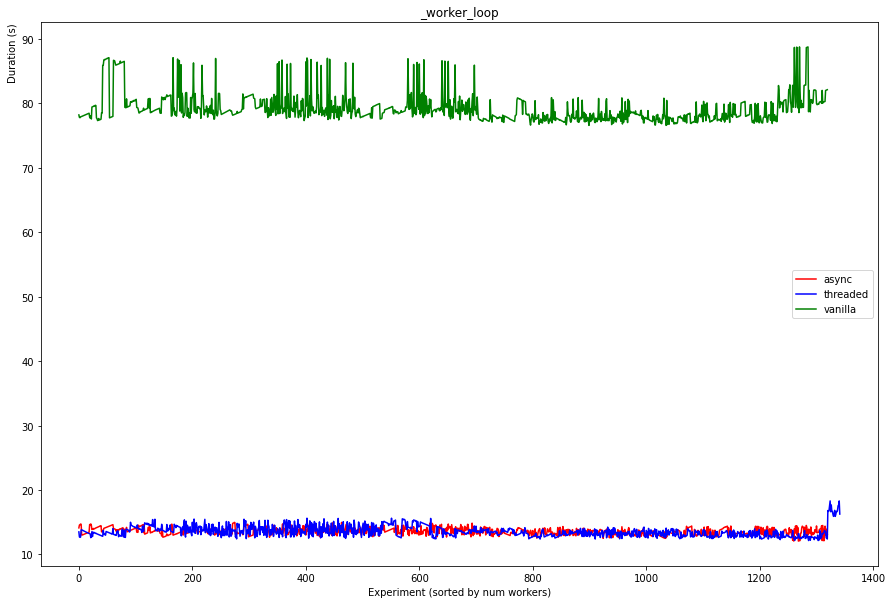

In [49]:
plot_stats("_worker_loop")

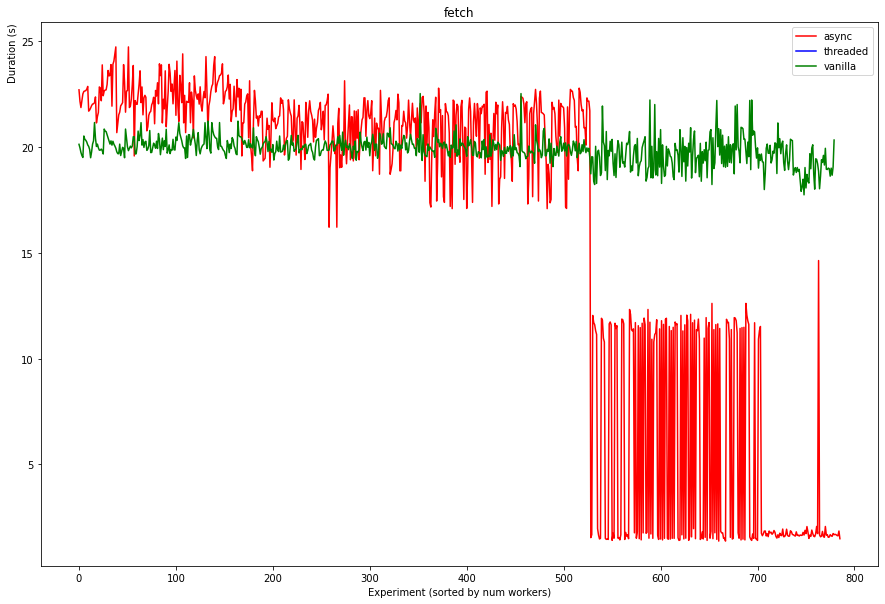

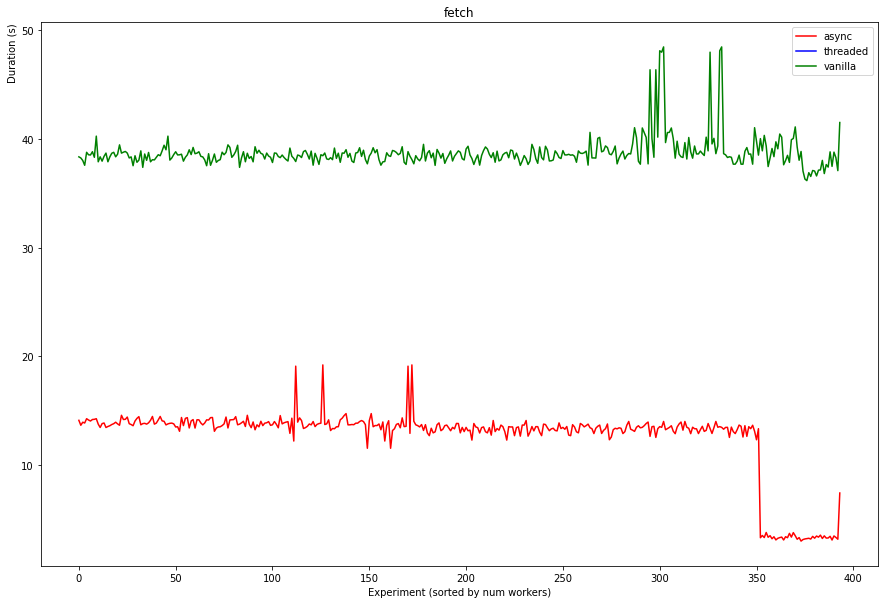

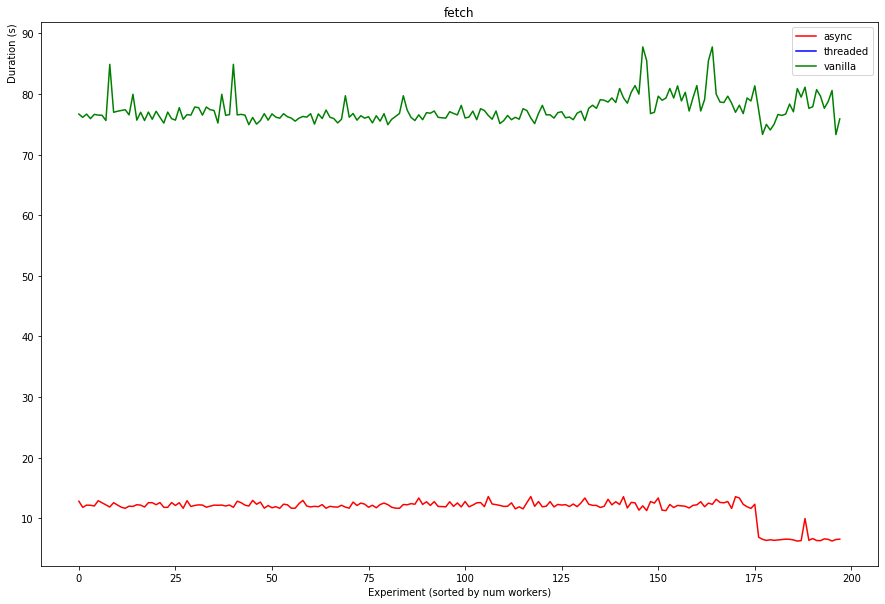

In [50]:
plot_stats("fetch")

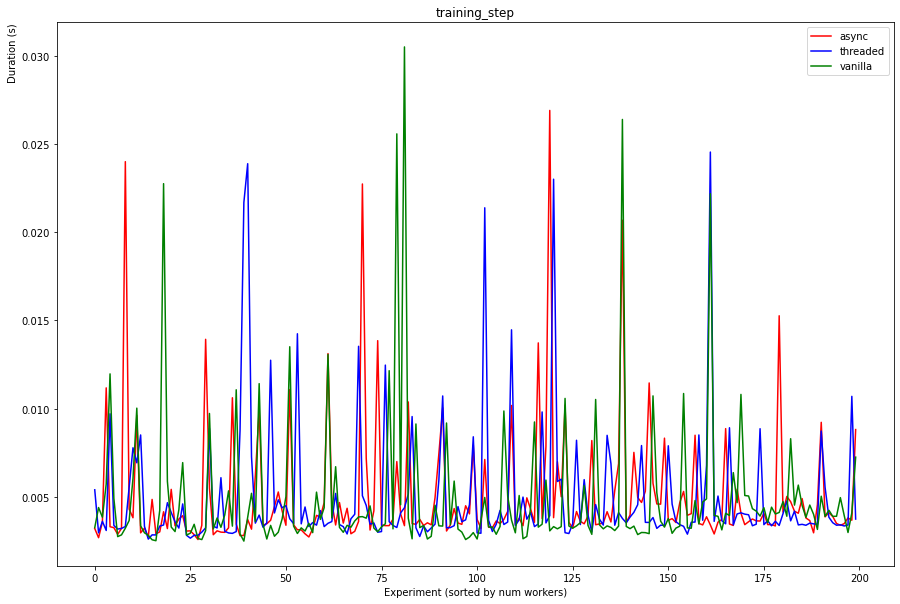

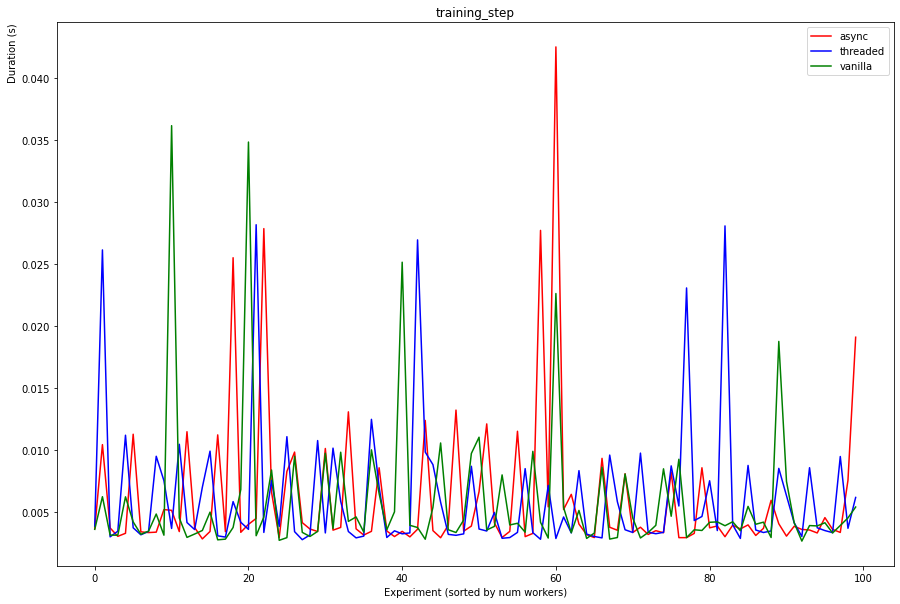

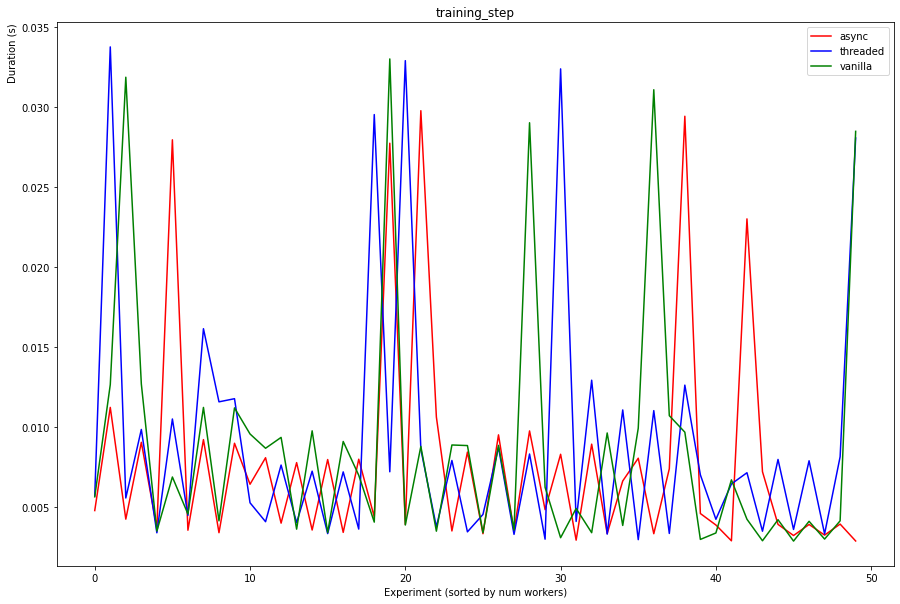

In [51]:
plot_stats("training_step")

### GPU Utilization

In [52]:
def plot_gpu_stats(d1):   
    fig, ax = plt.subplots(figsize=(15, 10))
#     ax.axis(ymin=0.003, ymax=0.012)
    for i, (batch_size, color) in enumerate(zip([64, 128, 256, 512], ["red", "gray", "lime", "aqua"])):
        s3_fix_1 = d1[(d1["num_fetch_workers"]==16) & (d1["batch_size"]==batch_size)]
        s3_fix_1 = s3_fix_1.sort_values(["num_workers"], ascending=True)

        if i == 0:
            xrange = s3_fix_1["num_workers"] - 2
        else:
            xrange = s3_fix_1["num_workers"] + i - 2
        ax.bar(x=xrange, height=s3_fix_1["a_gpu"], width=0.25, color=color, label=f"A-util, {batch_size}")
        ax.bar(x=xrange+0.3, height=s3_fix_1["t_gpu"], hatch="xxx", color=color, width=0.25, label=f"T-util, {batch_size}")
        ax.bar(x=xrange+0.6, height=s3_fix_1["v_gpu"], hatch="...", color=color, width=0.25, label=f"V-util, {batch_size}")

    ax.grid(linestyle='--', which="both")
    ax.set_xticks(s3_fix_1["num_workers"])

    ax.set_xlabel(f"Number of workers", loc="center")
    ax.set_ylabel("GPU Util", loc="top")
    ax.set_title(f"S3 Asyncio vs. Threaded vs. Vanilla Pytorch + Batch sizes  \n Bigger is better", loc='center')
    ax.legend()


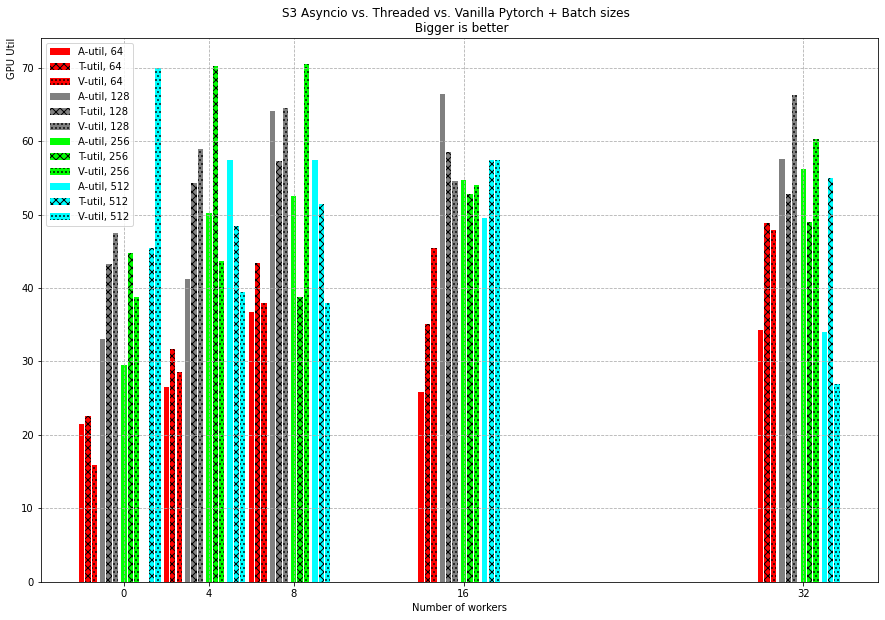

In [53]:
plot_gpu_stats(s3_both)